In [1]:
import os
os.putenv("NLS_LANG", "KOREAN_KOREA.KO16KSC5601")
import cx_Oracle
import pandas as pd
import numpy as np


In [2]:
conn = cx_Oracle.connect('team/1234@192.168.0.52:32764/xe', encoding='utf-8')

In [3]:
df = pd.read_sql('SELECT article_id, article_category, article_media, result.result_acc FROM article_article article, article_result result WHERE result.result_id = article.article_id', conn)

In [4]:
df.head()

,ARTICLE_ID,ARTICLE_CATEGORY,ARTICLE_MEDIA,RESULT_ACC
0,105_293_0000026457,IT과학,블로터,60.000000
1,105_015_0004282535,IT과학,한국경제,60.000000
2,105_215_0000843890,IT과학,한국경제TV,50.000000
3,105_018_0004566624,IT과학,이데일리,33.333333
4,105_014_0004366124,IT과학,파이낸셜뉴스,50.000000


In [5]:
df.describe()

,RESULT_ACC
count,1.935153e+06
mean,4.045819e+01
std,2.344624e+01
min,0.000000e+00
25%,2.500000e+01
50%,4.000000e+01
75%,5.714286e+01
max,1.000000e+02


In [6]:
df.ARTICLE_CATEGORY.unique()

array(['IT과학', '경제', '사회', '생활문화', '세계', '오피니언', '정치'], dtype=object)

In [7]:
df.ARTICLE_MEDIA.unique()

array(['블로터', '한국경제', '한국경제TV', '이데일리', '파이낸셜뉴스', '머니S', '연합뉴스', '아시아경제',
       '디지털데일리', 'ZDNet Korea', '한국일보', '서울신문', '머니투데이', '뉴시스', '더팩트',
       '한겨레', '매일경제', '서울경제', '스포츠서울', '조선비즈', '동아사이언스', '동아일보', '디지털타임스',
       '노컷뉴스', '경향신문', '전자신문', '부산일보', '스포츠조선', '뉴스1', '스포츠동아', '세계일보',
       'KBS', '아이뉴스24', '헤럴드경제', '스포츠경향', '국민일보', '데일리e스포츠', '데일리안',
       'OSEN', '포모스', '엑스포츠뉴스', '조선일보', '스포츠월드', '일간스포츠', 'YTN', '문화일보',
       '매일신문', 'TV조선', '중앙일보', '미디어오늘', '중앙SUNDAY', '연합뉴스TV', '주간동아',
       '신동아', 'MBC', 'SBS', 'JTBC', 'MBN', 'SBS CNBC', '채널A', '여성신문',
       '강원일보', '조세일보', '시사저널', '오마이뉴스', '코메디닷컴', '주간조선', '매경이코노미',
       '이코노미스트', '프레시안', '한경비즈니스', '주간경향', '한겨레21', '참세상', '일다',
       'enews24', 'TV리포트', '기자협회보', '시사IN', 'MBC연예', '헤럴드POP', '스타뉴스',
       'MK스포츠', 'SBS funE', '헬스조선', '마이데일리', '씨네21', '텐아시아', '조이뉴스24',
       'KBS 연예', 'OBS TV', '월간 산', '뉴스타파', '앳스타일', '뉴스엔', 'EPA연합뉴스',
       '레이디경향', '코리아헤럴드', 'AP연합뉴스', '티브이데일리'], dtype=object)

In [8]:
len(df)

1935153

In [9]:
grouped = df['RESULT_ACC'].groupby(df['ARTICLE_CATEGORY'])

In [10]:
grouped

In [11]:
grouped.size()

ARTICLE_CATEGORY
IT과학     52867
경제      439980
사회      645115
생활문화    122827
세계      162259
오피니언    148683
정치      363422
Name: RESULT_ACC, dtype: int64

In [12]:
grouped.sum()

ARTICLE_CATEGORY
IT과학    2.592836e+06
경제      1.919671e+07
사회      2.571255e+07
생활문화    5.175110e+06
세계      6.487652e+06
오피니언    4.603424e+06
정치      1.452451e+07
Name: RESULT_ACC, dtype: float64

In [13]:
grouped.mean()

ARTICLE_CATEGORY
IT과학    49.044509
경제      43.630877
사회      39.857309
생활문화    42.133328
세계      39.983308
오피니언    30.961331
정치      39.965952
Name: RESULT_ACC, dtype: float64

In [14]:
grouped2 = df['RESULT_ACC'].groupby(df['ARTICLE_MEDIA'])

In [15]:
grouped2

In [16]:
print(grouped2.mean())

ARTICLE_MEDIA
AP연합뉴스     45.688933
EPA연합뉴스    38.483969
JTBC       42.286200
KBS        33.476877
KBS 연예     39.001832
             ...    
한국경제TV     49.464295
한국일보       37.823883
헤럴드POP     41.585148
헤럴드경제      36.730582
헬스조선       40.508486
Name: RESULT_ACC, Length: 100, dtype: float64


In [39]:
grouped2.mean =grouped2.mean()

In [40]:
grouped2.mean

ARTICLE_MEDIA
AP연합뉴스     45.688933
EPA연합뉴스    38.483969
JTBC       42.286200
KBS        33.476877
KBS 연예     39.001832
             ...    
한국경제TV     49.464295
한국일보       37.823883
헤럴드POP     41.585148
헤럴드경제      36.730582
헬스조선       40.508486
Name: RESULT_ACC, Length: 100, dtype: float64

In [42]:
df = pd.DataFrame(grouped2.mean)

In [43]:
df

,RESULT_ACC
ARTICLE_MEDIA,
AP연합뉴스,45.688933
EPA연합뉴스,38.483969
JTBC,42.286200
KBS,33.476877
KBS 연예,39.001832
...,...
한국경제TV,49.464295
한국일보,37.823883
헤럴드POP,41.585148


In [68]:
sql_media_acc = 'UPDATE ARTICLE_MEDIA SET MEDIA_ACC = :1 WHERE MEDIA_NAME = :2'

In [63]:
cursor = conn.cursor()

In [69]:
for i in range(0, len(df)):
    media_acc = [df.iloc[i]['RESULT_ACC'], df.iloc[i].name]
    cursor.execute(sql_media_acc, media_acc)
    conn.commit()
    print(media_acc)

[45.688932980599645, 'AP연합뉴스']
[38.48396883828217, 'EPA연합뉴스']
[42.28619953989929, 'JTBC']
[33.476877011046255, 'KBS']
[39.001831501831504, 'KBS 연예']
[36.60333043894967, 'MBC']
[48.712340203304066, 'MBC연예']
[42.95569213863891, 'MBN']
[49.22930039309348, 'MK스포츠']
[50.0, 'OBS TV']
[50.93107251852501, 'OSEN']
[40.25886701205737, 'SBS']
[35.64114388782052, 'SBS CNBC']
[35.98056074979153, 'SBS funE']
[41.279133324587875, 'TV리포트']
[34.18246029271026, 'TV조선']
[44.727592197809585, 'YTN']
[53.21700645910541, 'ZDNet Korea']
[51.89566165756641, 'enews24']
[37.6429936323041, '강원일보']
[32.33780402464411, '경향신문']
[32.933845775839245, '국민일보']
[40.015451316821185, '기자협회보']
[43.85714056415952, '노컷뉴스']
[37.86599752805447, '뉴스1']
[46.34379509379509, '뉴스엔']
[43.54153156784736, '뉴스타파']
[41.887433205413465, '뉴시스']
[40.33989128531946, '더팩트']
[56.80691620207744, '데일리e스포츠']
[43.80381938290941, '데일리안']
[43.1670877504211, '동아사이언스']
[30.56992739106224, '동아일보']
[45.831916152771875, '디지털데일리']
[38.7218330473076, '디지털타

In [45]:
list1 = df.values.tolist()

In [46]:
list1

[[45.688932980599645],
 [38.48396883828217],
 [42.28619953989929],
 [33.476877011046255],
 [39.001831501831504],
 [36.60333043894967],
 [48.712340203304066],
 [42.95569213863891],
 [49.22930039309348],
 [50.0],
 [50.93107251852501],
 [40.25886701205737],
 [35.64114388782052],
 [35.98056074979153],
 [41.279133324587875],
 [34.18246029271026],
 [44.727592197809585],
 [53.21700645910541],
 [51.89566165756641],
 [37.6429936323041],
 [32.33780402464411],
 [32.933845775839245],
 [40.015451316821185],
 [43.85714056415952],
 [37.86599752805447],
 [46.34379509379509],
 [43.54153156784736],
 [41.887433205413465],
 [40.33989128531946],
 [56.80691620207744],
 [43.80381938290941],
 [43.1670877504211],
 [30.56992739106224],
 [45.831916152771875],
 [38.7218330473076],
 [47.453703703703695],
 [46.26725662957548],
 [28.85394687230468],
 [41.09654853004752],
 [42.64725017919684],
 [40.48051533613322],
 [40.97835968455826],
 [27.3619219452551],
 [49.167143841693836],
 [45.86554935825501],
 [55.5181902636

In [21]:
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)


Malgun Gothic


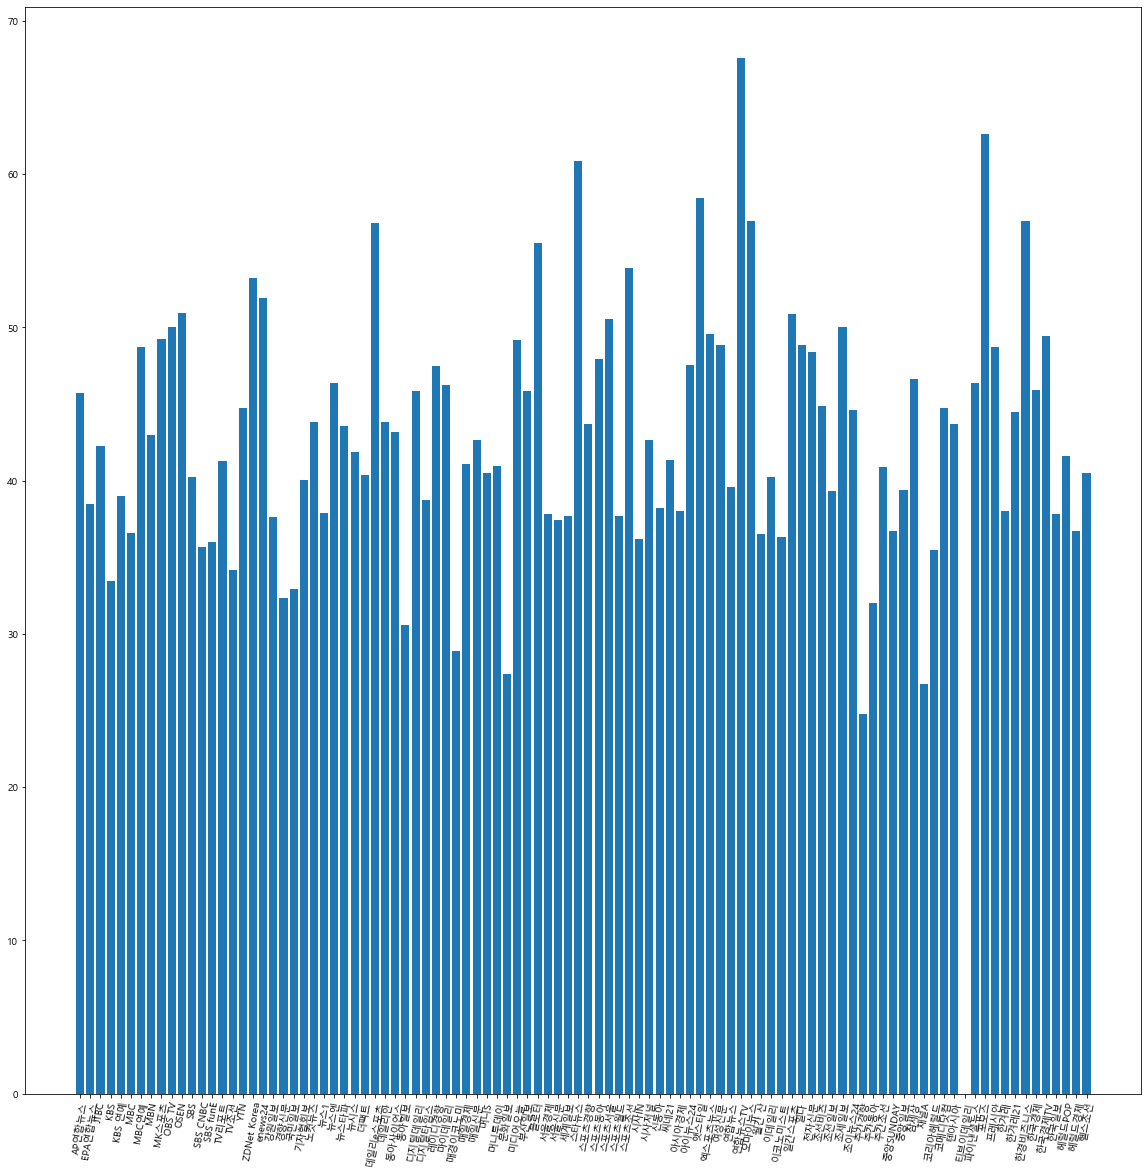

In [22]:
fig = plt.figure(figsize=(20,20))
plt.bar(grouped2.mean().index,grouped2.mean().values)
plt.xticks(rotation=80)
plt.show()

In [24]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABHwAAASWCAYAAABYV7vLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdT4jt513H8c9jp81FDebaXKxEymgtVSgu5NIQStWFQmVaCmlBqErBYETsKhiZTaULlaHFUqSEkkVxI/5JQiE4FP8EpdLUmJtuugiloKddFHW8dlFMiZQ8LjJpp7fXzO8kc+7MfOb1gsA95/yG+UJD2r7zfZ4z5pwBAAAAoMf3nfYAAAAAAJwswQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAymzdil9y5513zu3t7VvxqwAAAAAuhGeeeea/5pxXbvbZLQk+29vbuXbt2q34VQAAAAAXwhjjK//fZ450AQAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUGbruAfGGB9M8r4jb701yduTPJTkUpIn55wPbmY8AAAAANZ1bPCZc34iySeSZIzx3iQ/nuTjSe6bc67GGI+MMe6ecz612VEBAAAAWGLxka4xxvcl+Z0kn0xyac65OvzosST33OT5+8cY18YY1w4ODk5iVgAAAAAWWOcOn/ck+bsktye5fuT960ku3/jwnPPhOefVOefVK1euvLopAQAAAFjs2CNdR/xGkvuSfCPJHUfev5zECg8AAADAGbFow2eM8fq8eIzrP+ec30xy2xjjrsOP703yxKYGBAAAAGA9Szd8fi7J54+8fiDJo2OM55M8Pud89sQnAwAAAOAVWRR85pyfTvLpI6+fzk0uagYAAADg9K1zaTMAAAAA54DgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQZuu0BwAAAIDzbHt3f/Gzq72dDU4C32HDBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKDM1mkPAAAAAGfB9u7+4mdXezsbnARePRs+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKLN12gMAAAAAm7e9u7/42dXezgYn4Vaw4QMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlFgWfMcbbxhifHWN8bozxe2OMt4wxnjh8/dFNDwkAAADAclvHPTDGeG2S30/ynjnn1w/f+0yS++acqzHGI2OMu+ecT214VgAAAAAWWLLh88tJvpLkzw+3et6W5NKcc3X4+WNJ7tnQfAAAAACs6dgNnyRvTvLDSd6V5MeS/EOSZ458fj3JT9/4Q2OM+5PcnyRvfOMbX/WgAAAAACyzZMPnW0n+ds75rcOtnv9OcvnI55eTHNz4Q3POh+ecV+ecV69cuXIiwwIAAABwvCXB5/N58VhXxhg/kuQbSV43xrjr8PN7kzyxmfEAAAAAWNexR7rmnP8yxvjSGONzeXHb54G8GIoeHWM8n+TxOeezG54TAAAAgIWW3OGTOeeHknzohrdd1AwAAABwBi050gUAAADAOSL4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAma3THgAAADiftnf3Fz+72tvZ4CQA3MiGDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACU2TrtAQA2aXt3f/Gzq72dDU4CAABw69jwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQJmt0x6As2V7d3/xs6u9nQ1OAgAAALxSNnwAAAAAygg+AAAAAGUEHwAAAIAy7vABAODCcF8hABeF4AMAF4D/kwsAcLE40gUAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAma3THgAAgJe3vbu/+NnV3s4GJ+FW8Z85AK+WDR8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAECZrdMeAAAAuFi2d/cXP7va29ngJAC9bPgAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJTZOu0B4Kzb3t1f6/nV3s6GJgEAAIBlbPgAAAAAlBF8AAAAAMo40gUAAMCZtM71Cq5WgO9mwwcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGV8LTsAAOeOr2oGgJdnwwcAAACgjOADAAAAUMaRLgA4RxxjAQBgCRs+AAAAAGVs+AAArMmmFQBw1gk+AAAAwInzL0hOlyNdAAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJTZOu0BAAAAgLNre3d/8bOrvZ0NTsI6bPgAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJTZOu0BAAC4uLZ39xc/u9rb2eAkANDFhg8AAABAGcEHAAAAoMyiI11jjC8muX748uEkzyR5KMmlJE/OOR/czHgAAAAArGvpHT7/Mef8xZdejDE+k+S+OedqjPHIGOPuOedTmxkRAAAAgHUsPdL1wkt/GGNsJbk051wdvvVYkntOeC4AAAAAXqFjg88Y4weSvGmM8dkxxl8l+dF853hXDv98+SY/d/8Y49oY49rBwcGJDQwAAADAyzv2SNec83+SvClJxhi/lORjSe448sjlJN9TdOacD+fF+35y9erVeRLDAgAAAHC8JRs+rzny8iDJTHLbGOOuw/fuTfLEBmYDAAAA4BVYcmnzT44xPpXkfw//+u0kr0/y6Bjj+SSPzzmf3eCMAAAAAKxhyZGuLyV5+w1v/2tc1AzcQtu7+4ufXe3tbHASAACAs2/pt3QBAAAAcE4IPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJTZOu0BAOBmtnf313p+tbezoUkAAOD8seEDAAAAUEbwAQAAACgj+AAAAACUcYcPAADATaxzn5y75ICzxoYPAAAAQBkbPgA34d/oAQAA55kNHwAAAIAygg8AAABAGUe6AAAAqOJ4PtjwAQAAAKgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGV/LDgBQaJ2vJE58LTEAtLHhAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMq4tBkATsE6F+q6TBfgRf7ZCbCcDR8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQxqXNXCi38qK/dX7XSfw+AAAAeIkNHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFDGpc1wwd3Ki6wBAAC4NWz4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACU2TrtAYCLZXt3f/Gzq72dDU4CAADQy4YPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAECZrdMeAIBXbnt3f/Gzq72dDU4CAACcJTZ8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKbJ32AAD0297dX/zsam9ng5MAAMDFYMMHAAAAoIzgAwAAAFDGkS4A4NxzbBAA4LvZ8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBlfy86J8HW4AAAAcHbY8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlXNoMAAAlfJEGAC+x4QMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKuLQZADgzXDgLAHAyBB8AADiGGAnAeeNIFwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACjj0mbgFXF5JQAAwNllwwcAAACgjOADAAAAUEbwAQAAACjjDp9S7lcBAACAi8uGDwAAAEAZwQcAAACgjCNdACfIcUoAAOAssOEDAAAAUMaGDwAAAHBm2Jo/GYIPAHBh+R+UAEArR7oAAAAAytjwAbiAbDUAAEA3Gz4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAymyd9gAAAJx/27v7az2/2tvZ0CQAQGLDBwAAAKCO4AMAAABQRvABAAAAKOMOHwAAvs1dPADQwYYPAAAAQBnBBwAAAKCMI10AAHDBrXOUzzE+gPPBhg8AAABAGRs+AAAAcAps17FJNnwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFDG17IDUGWdrzdNfMUpAACdbPgAAAAAlLHhAwBZbzPIVhAAAGed4AMAcIsIiwDArSL4AAAnTtgAADhd7vABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZVzaDAAAVHORPHAR2fABAAAAKCP4AAAAAJQRfAAAAADKLA4+Y4wvjDHeOcZ4wxjjr8cY/zTG+NMxxms3OSAAAAAA61l0afMY431Jfujw5R8m+aM555NjjI8muTfJX25ovjPHhW9smr/HgLPEP5MAOMp/L8D5ceyGzxjj9iS/nuTPDt96y5zzycM/P5bkng3NBgAAAMArsORI158k+YMkL9zkZ64nuXyzHxpj3D/GuDbGuHZwcPDqpgQAAABgsZcNPmOMX03y1Tnn00ffPvLny0luWnPmnA/POa/OOa9euXLl1U8KAAAAwCLH3eHz/iTPjTH+Islbk/xCkn8fY/zsnPMLSd6b5O83OyIAAAAA63jZ4DPn/PYtW2OMDyf55yRfTvKpMcYLSZ5O8jebHBAAAACA9Sz6lq4kmXN++MjLnz/5UQAAAAA4CUsubQYAAADgHBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKbJ32APBKbO/uL352tbezwUkAAADg7BF8AAAAgHNtnaWA5GIsBjjSBQAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMr6WHQAA4IT4amjgrBB8AAAAzql1ApO4BBeLI10AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUMa3dAEAwIb4BiUATosNHwAAAIAygg8AAABAGUe6AM4AK/8AAMBJsuEDAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAyri0GQAA4JSt8wUOiS9xAI5nwwcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAos3XaA3Cxbe/uL352tbezwUkAAACghw0fAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABltk57gItie3d/8bOrvZ0NTgIAAAC0s+EDAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQJmt0x4AAM6z7d39xc+u9nY2OAkAAHyHDR8AAACAMoIPAAAAQBlHugAAAOAccaScJWz4AAAAAJSx4XPGKbcAAADAumz4AAAAAJSx4QMAAHDBOEkA/Wz4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMpsnfYAwMnY3t1f/Oxqb2eDkwAAAHDabPgAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnf0gXAYr4NDgAAzgcbPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAECZreMeGGO8LsljSW5PMpK8P8kPJnkoyaUkT845H9zkkAAAAAAsd2zwSfKtJL8y53xujPFrST6Q5B1J7ptzrsYYj4wx7p5zPrXRSQEAAABY5NgjXXPOF+aczx2+fHOSLya5NOdcHb73WJJ7NjMeAAAAAOtadIfPGOPBMcaXk1xN8oUk1498fD3J5Zv8zP1jjGtjjGsHBwcnMiwAAAAAx1sUfOacH51zvjnJJ5J8LMkdRz6+nOR7is6c8+E559U559UrV66cyLAAAAAAHO/Y4DPGuH2MMQ5ffjXJa5LcNsa46/C9e5M8saH5AAAAAFjTkkubfyrJx8cYzyf5ZpIPJrkzyaOH7z0+53x2gzMCAAAAsIZjg8+c8+kkb7/h7X+Li5oBAAAAzqRFd/gAAAAAcH4IPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMpsnfYAAAAAdNve3V/87GpvZ4OTwMVhwwcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAAAGUEHwAAAIAygg8AAABAGcEHAAAAoIzgAwAAAFBG8AEAAAAoI/gAAAAAlBF8AAAAAMoIPgAAAABlBB8AAACAMoIPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAECZreMeGGPckeSTSd6QFwPRB5K8LslDSS4leXLO+eAmhwQAAABguWODT5LvT/LAnPNrY4ydJL+b5CeS3DfnXI0xHhlj3D3nfGqjkwIAAACwyLFHuuacX5tzfu3w5deTPJ/k0pxzdfjeY0nuufHnxhj3jzGujTGuHRwcnNS8AAAAABxj8R0+Y4y78uJ2zx8nuX7ko+tJLt/4/Jzz4Tnn1Tnn1StXrrzqQQEAAABYZsmRrowx3pXk3Ul+M8lzSe448vHlJFZ4AAAAAM6IYzd8xhg/k+Tdc87fmnNen3N+M8lthxs/SXJvkic2OSQAAAAAyy3Z8HlnkneMMf7x8PVXkzyQ5NExxvNJHp9zPruh+QAAAABY07HBZ875kSQfuclH33NRMwAAAACnb/GlzQAAAACcD4IPAAAAQBnBBwAAAKCM4AMAAABQRvABAAAAKCP4AAAAAJQRfAAAAADKCD4AAAAAZQQfAAAAgDKCDwAAAEAZwQcAAACgjOADAAAAUEbwAQAAACgj+AAAAACUEXwAAAAAygg+AAAA8H/s3Xe4ZWV5sPH7GYYywNCGMvTei2DDElCx995bLLHF2I0mxtiiiTFGY++KMWJi72JBELCBWECFAQTpOPQu7fn+eN7FWbNn79MGR1nf/buuc82cs/e719qrvOV5y5IGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJPTSEtUAACAASURBVA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAzBjwiYjNIuLNEfGm9vvuEfG9iDg2It72p99FSZIkSZIkzcVsRvi8HfgjsGb7/Z3AszLz7sAOEXHgn2rnJEmSJEmSNHczBnwy82nADwAiYiGwTmae2V7+PHDXP9neSZIkSZIkac7muobPZsDFvd8vBjYe98aIeE5EHB8Rxy9fvny++ydJkiRJkqQ5mmvA5zJgo97vGwNjozmZ+aHMvGNm3nGzzTab7/5JkiRJkiRpjuYU8MnMa4G1I2Lr9qdHAd+71fdKkiRJkiRJ87ZwHmleBnwuIv4IfCUzf3sr75MkSZIkSZJWwawCPpl5JHBk+/9xuFCzJEmSJEnSX6y5ruEjSZIkSZKkv3AGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgbGgI8kSZIkSdLAGPCRJEmSJEkaGAM+kiRJkiRJA2PAR5IkSZIkaWAM+EiSJEmSJA2MAR9JkiRJkqSBMeAjSZIkSZI0MAZ8JEmSJEmSBsaAjyRJkiRJ0sAY8JEkSZIkSRoYAz6SJEmSJEkDY8BHkiRJkiRpYAz4SJIkSZIkDYwBH0mSJEmSpIEx4CNJkiRJkjQwBnwkSZIkSZIGxoCPJEmSJEnSwBjwkSRJkiRJGhgDPpIkSZIkSQNjwEeSJEmSJGlgDPhIkiRJkiQNjAEfSZIkSZKkgTHgI0mSJEmSNDAGfCRJkiRJkgZm3gGfiHhTRBwVEcdGxN635k5JkiRJkiRp/uYV8ImIg4AtMvMewHOBt92qeyVJkiRJkqR5m+8In/sBhwFk5knAJrfaHkmSJEmSJGmVRGbOPVHEB4F3t2APEXEMcHBm3tx7z3OA57RfdwdOWfXd/Yu2KXDRakq3OrdlOtOZ7s+zLdOZznR/nm2ZznRDTHdb2EfTmW6I6W4L+2i6277tM3Ozsa9k5px/gH8HDur9/oP5fM6QfoDjV1e61bkt05nOdLetfTSd6YaY7rawj6Yz3V9yutvCPprOdENMd1vYR9MN+2e+U7qOBh4DEBF7AefM83MkSZIkSZJ0K1s4z3RfBx4UEUcDV1ILN0uSJEmSJOkvwLwCPllr9Tz/Vt6X27oPrcZ0q3NbpjOd6f482zKd6Uz359mW6Uw3xHS3hX00nemGmO62sI+mG7B5LdosSZIkSZKkv1zzXcNHkiRJkiRJf6EM+EiSJEmSJA2MAR/9RYmIl0TEojm8P1ZhW7Eq6YdudR4bz4N022MeKukvifmRdNviPbt6GPCZh4i4c0TsuwrpY9z/Z0gzrwW2I2Je5zgilkTE4rmkj4g1VzEAswR4XGZeO/L3dSPiiePSZFuEqrU71oiIBTPtc0Ss2aXNeS5i1X3PiNgvIt4QEW+NiOdExEMjYp3p0vX2c9bHKla0/hzTzXl7MHVsV4f+tuZ7rc/HuGPyl1L4rMq5+3OYzz72L+o/xT7dmua6j6v7/HV53yzyv8URsdEqlA0bRcQaMD4Pne58ru58LCK2jYgtI2JRRKw7h3RrtH83iYiN5pFu0XTlwKqa7/U0m2M+02dHxEERsfZ8y6/ZpumlHXQe2NJZF2/mm0d05lpvWYW8Zc7pWt57p6i68lZz2c+Wfr2I2H2W+7Z4rp8/5nPms4/zLvfmch/cFvKDvnZMNmnl52yvlxXMYVvzzm/nsI0F0asLrMJn7POnvmdva9fKn8pqa1gNzIuBQ4ETIyJ6QYc7A7/PzAsnJYyIbYD7Ah+HKpwi4gDg/My8YLptRsS1mfm+kc+LGW6Wu0XER4ETgTOBXwPHA6dm5nXTpH81sA1wdkRcAJwCnAFcPM33ezRwB+CVbd92AA4ETsjMU6fZx87ewO9b2oXATW3ftgOeABzWf3NE3BG4EViWmdcAN820gZY5fSwirgAubNv7HfDbzLxoFvsIrFCpOBR4HfBwYG3gAcDRwHUj210PuKalu2nktU2ALTPz12P2t5+Odq3sC3xyhu853+1Fuya3BTbLzBNaob99Zv5oum3OV1TD6KGZ+dl2fh7LyLn+Uxl37U93P0UFCzcCrsvMK+ezzYhYCizPzJsiYlfgrMz8Y+/1eZ27P7fZFtqtUrcRcOmkNF0BPc3rCzLz5ohYC1hjNEg85v3rZebV/bSz3Ndb8sdx+zJuP2+t8xcRGwDXZuYN07xna2A9Kj+/eeS1rYAdMvOHI8n2ovLlKyLiSuA84FrgYuqcXDXN9tYEHgEcEhGXAMupcuU04HeZuXzCcVrd+dg6mXkd8CTgK8DuwNXAce31sddXRKyRmTdlZretewHnAz9saYJ62MXYsqb390e143LsTNfyNN99d+CqzDx3zMs7RsTdgEuBC4DLgCuBK9r3Hvd56wKPbGXrH4AbgNOp8093D405JntS3/k37U+Pz8yjR94zth7R3Wvzvc/ba2OPdXeuJqXrvW/a/Hbc/s42Xxmzr3M9xxsCm2bm6XNM15XTOwOXZ+ZFEbEbdb2cN/peYO1J18UctzdTfXPa9DO8Z755xJ7Aksw8JiI2BTYHfgtsyfj8b9z25lsnm1W6dj2tBdwb2IW67x4FvGeG77YGsAS4JDNvBLam2g+n9N6zAG55enJnfeDJLX+/lMqnr27/vzgzr59hu935ekpEXAV8fDZlLHM/LitcF+3eWwJsRZ3HMzLzdxM2uWlEPBpYBJwKXETlZRfM9P3G7Ptc8og1qOvq9Pb7AZn58wnvXQfYOjNPb5+9D3B1Zv5smn3ZiSrTl82UT036jOny27ncvzMcl/WZqgtcSpUpZ9KrC8xiE1sAr4yIk4AvZuZpM+zPfOtWm0TE3wJLqTbfGdQ9eEZmXjKL/RwEAz7zszlwMtwSsOluvpcBb6ECCZMcQlW2P94Kp4OoQMmVEfGaaS6+vYH/g5UqSf8QET/NzO+OJmg39zFRgai9gD2AHYCnA3tGxAcy83UTtvcP7b27UI2zRwC7AgdHxJY5PuizHxU8ISLuQVWW9wIeEhHvyMwTpjkuUDf/Be273dj7+87AuErvXwF3ATaPiI2Bn1MF4TLgKy2TWgr8oZc5JvAmYLP2/TYG7g+8OiKWZeZLZ9jHW0TElsBZwFeB/YH/Al6dmZeNeftjgWdGxDXUMfoN8LXMPBN4GJUR/XpMhvxPwEOjAlQvAu5EVWS6fZiU8c9re73/3w/YADiBCmYtAX40aXsR8RqqQrEcOLv9XDDLCvOewAOBz1LX+ROBw6ZpRGxBVcbPGz0GLdPfNzOPmmmjrfC4e2Z+u1WaNqAaTY/NzM/03rcEWNyOHcCdgZPae2ett59vBP6eaqS9FngB0C/Y53ut9Le1O3W/XkJVhC6hGgYTgwcTPmdptkB0q1ifPKZBuCt1j15CCxpQDc8bRz+vWZ/Kgw6IiIupisIZVKXtjMy8ZJrvtVFmXta7Bh8EXAN8e4av8uaIeHVmXtcqlQ8ALgd+Ml3FCdgmIh5J5Rvnt5/zgAsz85oJ+7lK56/392cBXwTOnOZcHwj8NbBdVGD+d1Tl/Dgqz96MClZ0Ddmg8tLfUgHq21ENj6OBNYDrI+JG4OxxZUpm3hAR3wWOpBowS4HtqUbIFi2YEMDnM/M7vaSrNR+jOjpeDGxLXZu7A1+iBXymqfTuHhGvA9alOkfuAnw6Io5vjYhJ1+VmwAepfOK+wEOB9/W3FRFrjWuIRMS7gXd0DZuIuH0rK18CfIbxZd9i6vjvSNUfllH5ycKI+EJmnhcRtwPOzMzLW5o12vueBlxPlZebUHnP7SLiU9So7/W7srrli/tTjceF7TM2jojnUffsSZl57jTHc8eIeH7b17NamtO6/ZrmPu+u1xdS9ZafUvfdscDdgPMy87fTNXzmkN+uSr7SD4bsB/wxM0+JGgF+84TGR/8e34Vq8BwFfDlHgjXTWEgF7F5A5RHHUB2R/0sL4PUsAu7fysaLqONwEZVXX5azCAR152lCfrV1jg9KEhH7U8HoqyNiq3Zd3h44vXddduabRzyeqnccAzwE2CozfxMRD6ECBz+ckHa+ect80m0C/AtVJt9I1Y3XbvfczVSgbtx3Wxd4OZWfXUjVUS6LiGOoeu15vbpPf3sL2zFZROXvl1MN3MXAD6i63N7Agsw8cXSjvc/5IfBI4GER8ZUZ6nNzPi7tvtmCOs9PofKfTdt+3kB1PE/yR6ocWxd4DpW3HU/lT+tRnRjnAEfmhE6MOeYR3Xu3o9p6fxsVcH0xVQaPsx3w71EBvxuoMvfX7fffZOblUUHfzMwrWn67M1X2L4mIm6k20clUp/1JmXnmhDp4l2feB/gP6jyfQ9VVT6YGI8wYIJ/NcWnn8Ip51gX6LgY+QrU3HhMRX8vMk0b2oX9tPwZ4drvGTmf29+wlwMeo+6fbz4dQbceFbT+upOpO0w28uE0z4DNHUT2cN1M30mgv02bURTidHahMCeBxwNLMfEqrnD4DePs06X7V/r+AupFupIIs3xqXoJepXk5l8MdTjdWgKl5fmLSTrbF2GnBaaxydSAVk7pWTR/hsRlU+oBrtn8vM10fEu6jRQjMFfL4GHBgRf9PSXtoywHtQle/RfXwn3DKS6NXAp6gK1EGZ+cXWuHlnZj6hl+ZmqmBYRvW+3pEKusEcG/BU5nEEsBtVSD0CuOPom1rm8wngExHxZSrzfQJVAT6TqlAfP5qu2YbK5F5DNTa2BH7Se/3vIuLnmfmDVd1eRKybmddExLOpIN9X20u7ABNH90SNRNiCqmhuBOxEFcILI+KyzHzzhDTXUSOi7gC8q720B1O9VwsYP2rrWVSA9HiqQnNdq3R+FrgP1SA4appGcucuVGPp2y3dXsDnqADXZ3rp70AV7mtS99wi4MiIOAL4RWZeGxGbA1dOVyFqhfFTgYsy87KoQNLW/crIKl4rt3wG1UO0I3UuFrT9vjaqt+5yqsK/PDN/PyZ9V3HYEPhn4AVRAdW/z8xnjNnWRlSgLtvP9cDVreJ+GS3olJnntONwRftuX2jHcimVvz2YqigE1bB8d1f493yqNVzWoBpl96PuwW5/Vur1j4hdqCDgdVFTBB5IVUqWAO8HVgps9FxN5X2bU/nbTsA67XOvYyrA9bXMvP7WOH/Afq2i93jgf2NqtMq4StAXgC+0hsOnqArZZu1zdqMq7LdoFewFVKDriqiA+FIqGHI7quK2hAmBjea5wMFMjZBcBvyYCvJeS+WFfxhJs9rysfY9j4iI06lztT2VVz8sIh5M5R+LgX/KzJ+MpPtNRDyFqUrhCVT58KV23C5s3+0NI42I1wIfBrZqjdxNqLLz21SZsBR4SUR8NDMvHtnd3alAYufDEXF3qjf/jAnf75cR8au2jwdRx/966vq8or3tRdTo08tbmiuBn0TEvanA12XAPalr+KFUPngg1cA4oaW5mRpteRhA1Pp621Fl8iOB57dr6HOZ+R9jdvUsKm9fn2p870DluZu249kFid+fNUq3+35dg+Zs4Pntey0HXkU1iK6NiEdm5rJxx6f7jJny25455ytjPIkKnJ4C/A3VEBob2O39fjI12vtgpho8XeBvYvmVFXh9LnX8ftn+vAOtw21EMNX435w6f1D34XURcTV17RydmaP3bRfQfyYVkNmXamTtnBVwWx94BTCpo+y1wNPb+55LXY+vphrJowGfOecRve/9hYi4E1W//XT7+16M5H+97zTfOtK80mXmBRHxqvbrImBD6h56PNXh9eBWT/5g9oLC7Z59Vdv2EqqedXvqWG5XRSULgddm5k976S4FPt/usf2o/OHHVB7f1d8fS7UpVgr49D7nGOCYiPgE8KCI+Gcq37gme51Hq1juHUvV/T9JdcC+OTPvMmmfevt2BXBU2/7bqLrK74CvU8H2y6hg2QnA2IDPbPOI9v1ujhpF90jqWEId26un2cdlVLugq/NuS533l1F1jyOAv6WOzbfbNo4Cfp41aq+rx+1P5fPPiOpoPikznzP6Xdp/f03lQ3+gyuNHU/f9NlGd/B+cqW7c9uMpMx0X6jo8iKnRPadSbYVzmFwX6G/n+ravR0fEk4B/i4izgX/OzOXdfrZ6S2TmocCh7Ro7hdnXBzIi3tP26YyW9vtUWXc9dT/u3F4fLAM+c9QK2k9TUclndpWAiDiwvT7x5m8upSLQb6AaYv/d/r4n8M1xCVqm/QuqMXzeSMVjKVXhnqhVZN5EFaKLgPfmDKNtWmPvhVRF60rgm5n5runSUCOQ/jUi1qYizF2muBfw7hnS0hrOX6MK/a2ihk7en2rI/O80SbelRh4cExEXtIKHtu9j54BHxF9RFbSkKkNPG1MRn6g1vE6hBSci4uvUiKOPj/leGRELWxBtzcx8V7teuilk2wEf7d47knxLqhBbhzrPuwOH9zLse1IF5q2xvSdGBfe+T0W6u+OxPXW9jw4b7rZ3RUR8H7hTZv5b1HSw9aiG46S5s3ejKorfBT6SmWe3v+9JGz3H5EbnVm3/H9nS34dqNEAFHk6ZkA5YoSK9JfDzqJ7Z/ajh1fdjqvEV9fXy27Se3qj1PHZo23wJ1fvxe6oi+w4qSDq6va2pQn9dqtf4te2l3akGzQpTH1bhWqH39xOAE9q9uCV1DpdQ52XzdpzOafs+mr4bVv2E3vfZh6lAxy1Bh7at44DjWqV+S+r8bEkFHrai8pyzWPEefl17z6XU9X0qVfCfQxXAm3bHZsRC6hx9neox24Tq/e+8JSLelysGsnZi6pq4E/DAzHxmROwFvB747qQKUNaIy+93v7fjuXnb903az9Kukr6q5y+qt6m7xi5t2zo8ajrvnamRl2/ubasbNbJ5Zn4rKljblQ87AR9q7+3ft/9OBTY/R90/32gNkm4E1+/b95zki+24vZC6Lram8vhd2raTqsT2rc58jKj1Kx5FNf66UZ5Pi4h3UiMxb6Y6WFYI+DRrMTXC8TdUcOeiVibuBuydKwZpFwLbZuY3W/Djme2ldal8Y+2sYODjgLeN7OdS4PpsgeJ2D/0hW3AyM88as3/943M98N3MPDIi9svMT7XPCWCnbEHW7m/tOG1O9fo+gOpx/gmVP50CPI+p4HuXbkdqRML9qMDxKcDHMvND7fV1mFDOUoG1T1L5TBccPJxqdN5ENfC2yV6wZ8Q3qPx4Z+DYzDyr1b8Oo/KUlcwlv+0lm0++0u8k+ce2P12AYStq9MG0Wn3x8KgRG38NvD8ifkpdczeO5kvtWL+AuqbPBt7Wrq21qHvknHHbiIhfZDXeu3tjB6qRs2X77tswuby9HXW/7Esd1wVUEOLx7bUd2+eucExbGbJuZl4VEf8CfLvdK5tk5vmsbM55RLMn8Aaq3vBepvL6HRif/807b1nF/P1Z1LW/NXBAZr45It5CXXMvAz5BXe8rdBpHjR58NHWszwJ+lpnPb6+tS5Xlo2m6Y7aQytO/EBXs/kZvv/YCvjzmePY/545UnvdT6vp8PXV//IheXXe+x6W1bV5B5Tv3pZZIOHnkO0zat02o+tdhVJvmxFZu3ZSZ/9eOzetzzKi5eeQRd4mIh7X3Hp2ZR/beP+307KhRQC+i6l4/yVqWo780x4GsOJLw7tTMjauANanr+VhqhMqZmfnHqODRWJl5flRHw/H9+ywqWL9Oe8+kkZVzPS79usC+zK4uMMlnqTriU6lReU/NzK4NOe4a+6851AfWat9lIfB37ftcRtUzaZ/xu6wOtMEy4DM//wdsGxGHUtHxbtjz62dKmJnvjuqZuZbqFeuGj+0KvHNCmpsj4v3AR6KGCv+Eygj2oS7SScMV16AqmFtRDfaTchbD1dr+PYO6mT/eqyjMFBX+TkScQDU+ftvSrEs1nKedm9n7jCMj4sfAXakM4wPU9ImVetdahWKNzDw6Iq6LiDdTFYVuW3sy0uMVEfeiCtefUQ2eI0crAzNpx+HmqKGo9wQOoIbevz3HT+eiVd4WAeu0zGcf4A5RU282oRq8o9tZTFWwbwQ2zMwrW4Z8FypT/TBVYf/NaNq5bi+mFstbh+pd6Ae/NmDm8/dVWmU3p4I3XcNjnMupgmw5bbRcszNVKYLJFdDtqSj97lQF7+lMjXLbhTZiY9K12gqOlwPPpo7DOlQl6rpWwVmhxytqZM++VIDnauCIXLk3+3as2EvftwUVnPoF8JretbwXY3pk53OtjIqIp1HrBSyjepGObtfs3ajG2TET0u1DBVnXAU7JzM+1l3ZnzHXW0jy9betEpoYPH5NTUyo3p9dz0ir9b2/79iqmAigHUEGKm6jr45m9zXT3w4LWgLg6K9C4JXBjryJwV2oYct8l1IijQ6lRaF1ls3VZXQAAIABJREFU655MXdfB5Ok6t2v7spxqxP0iM3/a8te1qQDBLVbx/K3Xvv8m1EiNi6mgxR6tgnsfWsCnbev6dn1GO667tffuQt2347a1FnB8e/9DqdFsC6jzfmj73ElrB2xAVa7vGhHfBL6QmWdHjXBbQk0/2pXetObVmY/17EI1Uu9N9UAua/n1xpl5VNRaejuO+X53oiqvR1L3818Bj4iIj2f1oB/Xfvo2Ymra1XrUNXwDdTy3Ak5uZdX5Y/KkPVkx39gHOK/t65Vtn1aajtJd71lTZE6LmlK7Zdt3qHz00n6a3rZf3/Zvf6pndH1gUWZe3O6n0UDFW6jpAc+njvm+wMsi4r2Z+bus0WfTTQt6TjsOz6GujauogMUN1DU+dhRG2+cbgJ+2/Xp9RLwVuDEzvzopDXPMb+ebr7T75yUtz/wG8JmcmsZ6S5k5XZ2p9z2vjlpr8eNU/eQ3EfFXufKImy5Ysw3wnzk1GmRXqgGzUj0tKoj4g4j4A9Ww+VC2UTIR8VIqP1w0qe5CHbefUsHyM6lr67e911YaIdKCFK+kRmw+h5o69oNWf71kdD/nm0e079bdf5flilPopq23zDdvmWddbn/qPtueyhd+GBUA3hd4Uyubt6UtadBLt1777p+nOqT2Au4eNerqg1mB0tH8qCWNzTLzDxFxbES8g2qnfJOpcm5DxnSOdeellesHUh0w383MO0d1eO1J3bsrnMP5HJeWr30pamrQfYB/pa6ZBUyu/3X2pk3LYapzeR/afUDdI7dKnay9/2DqmB/Z+/suTHXar6Rdn++l7oUbgXtGTTX8Zm+b67LidX08tablH1ubZtO2nYdQa9FsQXXgjx0gANDPH1s95easToWZRrDM+rjMpy4wKiqIdjcqT1hMLXlyDtXJv9K9O+Ya25vZ1QfuQXX0vSwi3ktNb7uonZ89qHtj2xmOzW2eAZ95aDfOv0TEA6kM+yzgw1nDKKcVNTz/g73f16d6wt+ZmSdPSpeZp0YFYh5AVWC3peaYPnuaze0IPJm68R4D7BsRZ1IN+jOn202qsrglNcVqH6oH4Q9R69yslGlE9TztDGyX1dO5LhWxP5nKvKbNvFtB8lyqEDqKWl/gBcBumfmRCckOpm7221MBnG8xNe0NKvMfPaaHUoXALlRGtGE7JqdnDRGdi4+2nwOpBuyDI+K7OTLlrVVmbqLO2emtkdZVdO9Era0ybgHtvaiG7wZUI2Bj6px/g5outQSIHOkdnc/2WsH70Yg4lho2+tPWYN+WWqD4hjH7d4tW0e038tbMzBumef+PqGmG76UCEt3Uhc3orY81mq5VBCJrmOlmVAV2e6YqoJszQ89qRATV6/zYlvZnObUI6U7U8GKYqnDsC/wjNTx4Q+BeUVMuftgqRptTc/Anje47ieq1eB5VWe8qWXsy0thZhWtlVDdt4zyqR+Nq6t44hArGTFoIcTtqqukne8GesfvacwgVhL6cqsw+lVoj7NWZeTgjlVhqitxrMvNhEfEF4NzMvKRda4to92euvN7QHsBZrTF2aatwdGsUnBs1yuyK0fOQmcdHxA3tu/0yp0ZN7MLUdIhJwZ5nUcG8b1AVigOooe0fbAGAa9pP9/55nb/e74upysc2VI/aWtQ1+Yu2vyf10ixt32l9as2dG1uj7otU3njZ6H3b7p9udMAWbTsXUXn+uowfVdW3K1XpfC5VPlwfEadRoyO+mRXoH12QcrXlYy3dpsC/UYGFw6mG0tWsOH3vzozvmb0rtYD/Lb3XEXEQ8KSIOK1dp6P33jrUdbkH1fhcmyovf09VZo+j7p9x67PsS++cUufzt1SAtRtNMi5o/oioKSJrUtfGF7NGDHTBoV0YGQHTKshrtbxzQ+q6uYrKcy+LCmDc2L9/2vWydWa+v/3pUuD0ds4Oioix60n0/DU11fXDUVOHftUaMptTQaD12/GbVmZ+OSLOoTpWftX2bVIeOOv8tplXvtL2+0ZqGtiPu2BPVDBxxjKznY8nUqNLL6Tux7tT1+UHxgR7yFoI9UUtXzqEFacv9a+X/jZ3A36dmU9tjc1HUgGg7YDbZwV3xwZ4m12pnvd7UwGpxzF1j3fBIEa2uSZ1frs8qgtS7zlhP+eVR7TPO5YKdL4hInbOzNN79Zbrx52DVchb5pyuNbifSOXJZ1OLyH+bNvIta2T7loyvQ+zZvkcXVPh1RHyDWg9ofypwP+4a246apriUyt/fmJnfiKmnCC6h1ptaaWRd77N+QtUVTu+9dhlten+sOL14leotWcHWI6gg/d2oUSGfoTpZJtmLGsl8ChVI+W/qWu06EHdizAjmZq55xJep6/ylEbFhTq0/tSUrtzH6dqcWyT4RIGqq9ssz82vt96VUMOaa3rH5AHBz1Do151F1pYta+bKMKl8mPhkrIran1mn7XWb+T85y3Z5mLsdlPnWB/n6uT7XRzqLqHl/LzNdGxKIJbcxVucb2pdaMfCx1b5ze8ph7Ae9qdbmfzqJefZtmwGeOIuIOVE/VFdRwwuXUsORJC5T2024PvCoiDqbWr/gW1UD6VWZ+fpp0XeF5QWa+M6qX/vKc5kkv7cI9jYqWb0H1lOxJFdp/HxE/y8wXjkubmR+IiE9SmdVW7d8HUI3jVzJ+XYHHUUMBT41a5PTXbXt3oKYQzORuVGX7Y9T890uB7wHbR8TTs+ZujvoZ1Zi8mWqUvbnd8N2ilzvQe9pTq7weSPXCbt2+1wHUmh6LqUJ5Rq2Rv4DqFftiRLwoa75pt8jqqDtRFZ61gEWtYDolM3/WCt5JTwfbsO3jUVQ0fzfqWulGT92e8QXavLYXtU7ByRFxChUg/F+qUO16r8eOgugyyYh4FHBU1uigh0XE93JCr2FMrYnwX1Th/oqWAeekNM3u1GJ2O1L3wE0R8cesHsENqUrhtE9baxn68qinDD2XWrD7J1m9pZvSpkj2Mv79qAX2uifIbQ/cJzO74eV7s3JQo7+964HzI+IHwH1aI+mPjJ8qN99rZdSmwEdbZfIhTPV67UwNnZ3UYDqCKuSfGRFLcnbT+jYFPtEqq92UktcyNUJhXCBzi6i1unYCLopavPkuwKez5r3/fEy621OVgx2oiskeVMP6cCrosie9CmKrRHcV3hMz85e914JaZLd7QtGkQv5OwNcz81u9tAcD94uI03PlaaDzOn/t/uka9jdQ+dMxTK1x9H9UXtWfvrstNcVrCbX44BHUkz3Oigr8dA3G/n27LVVpOpCqsG3QfrajRktOfEJX0wXXf0E1UB9KNXZv6XgYc95Waz7WKscfpIIvXXDrHlQvcHcf7MaKIws7i1m5F/Q4qnzZhxrpMrq9c1oj/8vUNJeLqUboudRx/S+mrtlRO1LX0h5U7+Q92vv3ZyogNdpYjcz8XER8h6pc36P32XtHTQV4CCv3du4NPC5qjYTNqDrMr9o+XkuNthttHKxPNSoPzhXXTjmfChbMNDp2X2DN1njZilq7Zz8qP3lrZv5iusStrnN7qjHws4h4BBWkhAlrvM0xv4U55iu97VxFLcj6AKru0436nLbM7N0f21ENpdPb+z6UmS+P3ppd0/gsNbpo16wnoO7D5I6OfXv7cz1T65nsSsv/Yvo1ijbOWoh6aWb+PCL+npp+BHXMPgZTeWj7rPPadfgK6lrbhRoJtPeE/ZxvHrEt1WFwTUQso+otb23fubu/x9Vb5lvOzjldq6N8ghohsTYVyNqhfZ8zojpUN2H8WjBrU0HIdXvBmWuo/OX2TF6z5Ezgr6KC36+g2ihQ6/5sR52HaUd7ZK8DOiI2yKk1355JXav97zqn4xLVWbcRVUZdlfVkxCuoYNhXokby3ZFpRrFQ18gyanTM7tSI3Y2osvCeVBDw++MSzjWPaNf2eRHxI+pePzRq9NXCnOapzNRx79cNt6M6zrs8YFvaddprV2zbtrEhNVWxO09vBZ4zbnu9OvjtqPbWx6llMR7TyootgFdl5sum2df+cTlq0nFh6l6aT12g/7cDqKnQbxnZh0nX5arUjfeilgxIKj9/ErUEwzNoHSoT6sODYsBn7t5PNVB3ooZZnkNl3neKiLfnhKHwzSOpXtd9ohaQeh7wHeqxdhvn5JEsb6RuuLWihs6tCewfEZ/LMU9SgVsyj7WpCu8lmfll4MtdIy5apH9UVHDpPzLzxVSj68LM/Pp0B6Q5EPi/zPxMRHyOWrfgeVGLqT2ZalxNZ18qKvyVqMcS7tg+62+pwmncdzyL6pn7MTWa6A0R8SbgOa1Rvg+1VkjnAODhmfnPEfG7rKH93bSMRbP4jn0bUMfnCcBVUUNsF+bKvdSRmUcAd43qOdyNCiB0vSb7MXlY7bepee/dOXsNcErUU9f+tR2XT49JN+ftNTf3/u3mCO/PDGtEtWttDapnoLtWXkz1zk3SbWttpgq0fWgLOcbkJ3IsbO95P7BTa+R29qJl+tOkp72+B7BB1hDUc6gg0nWMDzitydQaQVD3+9m9ivmOzLBuEPXB34uIv83M97Y/rU9v2Ooqnrv+d1ufuv+ujRp5tyinRrWs233euMKtfZ/ToxaEvT9T19fY4fFRvS6RK/dMLqYNpx6znQOoHs5lVADqycCnMvN5I8diNF23oOozqdFWt6OGmp/a0tybFYdGL6UC1Qvb61dR57F7KtgFWYtiTufyto99y6ieoU3oXRe3wvn7EHW/vYE6T2e1bWxI9S4eTAXBu20dR5Up3fDq7tHjUJXlcfftVdQox7+iztF11NoSi7r3z1DxWUg9deMnUSMjj6SeIHOfzPzu6H33Z8rHoIILx1GBs1dRIyjeD7w4In5Ndbh8dky6t1CN+I9RDdOTqI6Ic2hTVybcNy+KiE1bsGlnqnd6XeoeeCV1vTxlzHd8adRUvd2pMvDnVFDpyaxcwe621Y3KvBz4bNSjl1/Yyr4DqOt1E1Ze7+QCavTi4vb/ZZl5UkT8nroudmPFtSW69dk+QD3l7u+pjpgL27/TPi672Y46t2tSDYRHA/+QmW+NqWnEK4ipRePfxNT6X4+KiE9mrS91SESQUwH3sWbKb3vmmq/093WNrLWzDoiagnUMVY5NV2Z2AYj7Uus3jR7zaYM97fhcETVKanH78y5Mlb2j1+eOTAUE92fqGOzBVOfdpFFI61NPZn1f+/f+wK5Z6xdC5U2jgcXu/t+BWjfjgVQj9kTq2uzqBV2AaF55RHMCU6MIzmVqeu2+TDgHq1gnm2+etBN1HXdrMB1DdY5sRU2H/xo1KnF0e8dGPZTkcxFxHnW+1qDy+cOYIOKWJ/leFDUt6C2tnnMN1em7mJnX79mOKiduBnaJ6sj9cfuOl/XeN5/jsg/V8N6YCjBcTwVnNqYWCn4VM/sxlY/tSR27Z1EPHziV6oT6JVPLA4w12zyiVyaeQo2YPrRtd9p1P1uZeOeI6NYtO5E610+IegLhZqy4tuEO1BIWl7S6W39d2C6fHqfLU/ahOrc+ExVIfAq1dMU+VDBsVoGNrIcevHDcceml7dcFfk/VBe4+qS7Q0wXqb3mq8wpfJFZ4CnX3twUj11hXXs62PrA+db9160UeQuVJi7NGvA4+2AMGfOakVcyuz8zjIuJEaiXxR7XXfkgVTNPZk6knVV1JRUM/1QruSYseQmW6j6Yax4dTFdgjgbdHxMk5ZqG+5vVUoGid1jBem3rs7Gdz8mPydm9piFqR/uXAc6PmU78tM580Id0WTFUa1mOq52Ep0zf8OztQhcrV1JS1bv+WMr5n9JaKYQs4/JgaJXRN13CMiMUjDbo7M7VoWbfo7E2MTMuYpauoCu8rqMLzoVTP7Ar6mUhWD8bxrNgrsxNjnrI2kq4rVK6mph8dB9y7Fch/nCbdrLc3kvYbtDnaVME59tG0UcHBbhHbFwHvyxquvzUV2Lx2Ukba+9tvmDpuS3r7utI0hvZZJ1KN+P6Q0O69YwuQCS6gnjoC1cC6N1Vx/EP77H5h9VHgvRHxVaqA/xnVmHp5RNyXquCMHS03sv8b0npG27lbI3vD/lfl3I3YhKn7Z1tq2uL21HmKHLMYaG8fu78fTfUUfbpVOK/J8VMUtgZ2iIj/pBrFJ1AjB7p1eMa5Ejgs64lIp1IVvQMi4k4tb53UK/Q+4H1RaxMsj1q89V1R6xU9hQqI9J8itoxqmHbrPGxCBa42p0Yerh0RF2fmSvdtzz8B/xgVoD+VqmA8nAoYrHCtrer5y8y/ieqRvY5qKJ1EjQA4gwoGHcTIo75Httdfy2EJYyq7LS/5CNwypaR78thatBEl01V8cmpqD1k9jRdGjSZ6bURc3vKm/vtXez7WfJW6/v5ANay/mDUd5jVRa6VckmNGEray5F+ovGQPal2JHwJfyhmGxudUj/eJwAlZvaXHRk0vOYC6p1b6jlkLg/+I3pMQ2zE5ZfRYTNjut6KmnW2amZ9s9ZSNGRkRkbWA5/lRwfkF2aZMZq3r981WR1hhpHILaCwDHtvy292oe+nnWU/RnG7K0gIqmH8oVSc4iToXe0XED6Y5nv0e5H/KGlXyGmok0+fbZ8y4JmBUMPqj7f8r5bft7/PJV/q6MmIdpqZZ7MNUY3zcsenKq72pEQ2j+z3jE3Tafz/OVCDqlvUrxqTteuGhTbGKiHOp+tKHp9nPbqrN3lRA6TTaNLe2n9sB1+bK08O7zzqUWpvji1T52E2LXeG6nm8e0d5/Zu/Xo5kaPbQpE56+eCvVyeaaJ32fymOvo0ZVLc+aVn0ysGNErJcrT0XOVg/5n6hpXLtSjdxLqc7Ra0f3a8K+XtkCDgva8TyuNZqvH03XiYgDqDLuCCoI/Vuq/fIK4IacWqtqvsflN9T5fA11jy6iRituDSyNiL+j2jn9dapGv+NnW172m6wg4SXUNXN9C5YczuQASfc9Z8wjRr7jJd37qbzwXGaQmW+JCprvTi26fD4VrDqs1ZX71/VNTAU2twduFxEvo/KXBUxeK63bv42YygdOioifRcRjqDbKrNZRhZnrqu3z+3WBC4ALImI58E/j6gJj3AXYp53DrkPl9BwzyjhXHG3V1XX6n78z069p9ITer78EfhkRT6TWxX366L03WJnpzyx/qN6Rk6nG7dupTGtX2tMdZpH+v1uab1AR8k9Rc7a/Sz3ufFyajal5tN3vx/X+/z2qATdpe0dTjZttqcrWQ6hK7NepJ2OMS/NE6nHIUBWs97X/H0St6zFpW++ghvZ+jGpsvpRqRP+IeorNTMdmi7Z//wj8J3XzHk41dvaf5flZG1h/mtc/TA1h/0DbxgvbudttuuM48hkL2r/PBh7Q/r8HsH37f4y8fy+qF2fhhM87GNhozN83pXrPFvT+tmgW+zev7Y153+bt330mbbcdt89QjdA79P5+CLWm1bjjsSHVg7ottZ5E/7V1qYj7SulmeW5eBzxxrumpRu8iar2Jt/fP85j33ZV68kj/79uOO0ZUITlpm1sBD+q/79Y6d92xbP9uRwV+3wP8D/CySd+vf9yoitd92/8fQC3ePum4bEONBuoeNfodKjg8l3N3cLuWNp9DmjcCm/V+3xFYb4bvdXcqj9uGGiI8Y95C5cGHUD2z/0itL/SnvPcWU0/p6f9tZ2oaYff7vahRPFuNu86ohsGikb9Ne09MuiZ6r2/RrvVx21trwt9Xez7Wjt+c84/5/lDBjOj9vtYs0kTLT8Yds+jO9XR5yBz3cXG7jqc9xzNdL/TK1/ke45ZPfGQW7/syNZ2o+/2D7d+vUsGtWe87K+a3M90Hs85Xeu/ZmhpVCVWvG1u/aq93dYgTqIbwP1BTASeWtdN81rpUoOmQWb5/d2r6/aupcmFW5cmEz3ogFbifdK105dpCKki3LnD4mPfNN4/oAvnjyqS9Jn3GfPOWVUi3BRVom/W9t6o/wDqj52GO6dejlq54LpXnPwr493GftwrHpVvbaSNqdN3ftZ/vUQGO78zme7bP6e6pudT7Zp1HUHny6Pfeh1pjdNLnb0J12Kw5z3O4JtUx9QxquugzZ5FmAZVfLWKqjHkl1VH1wEnHaLrj1o7LQ/vnvl3P206498bWBfr72P79OjW16q+pBxZ9iepc/jGw+0iavZlQ12mv32PcNdZe22DSvUdrt/3/8uMIn7m5kFpfZhHVA3Et8DCqETHdPE4AMvOpAFHzKfemMoynUZWFSQt/bQTc1CL03QJpj6Uygz9mu2pHRa2HEtkW/ot6rG+3UNg6TI5ML6EWhOwe5Xxh1Hop95m0j1Hzeq/OGp6+Ufs+76amG3wvZ3gyWEQEVcB8r9vH9vf1qYbZSkNzo56mck62xw62/b02a3jextQog5tHjs/m1HS8C6neih2ohtweVI/6Sk+bmMaetKlI2Zvr3N9e+14PoM5hfxG2w2mPnc4V10Xop7snlVlfFbUw2aXU3N/Lc/wjTee9vX76zMyoucmvBF6ZmWNHVzU3UQG5G1nxHO3N5CHtS6hjvgF1XV9LjZq5gOqR/gOM77VqvTF3pYZGn54rL+r7KdqUrkn3xcjnrdHeu7z9/kWqB7n/no3afy9v7xu3lsOkhW53j1rX6HLq6SYXtZ8LstY4WN7S37Sq5663v91i2de0zz6L9vTAqBFZa01It8Ioo8w8l6k84hymppesNPIqa4ThOfRGlMTk6RrbUvnYef1zlPUEl+NywvztlmdeSy0A26X7t+wtdpiZZ4x+p/bZydSQ531H9nmstv8bAZdmLcZ/RPsZfU+2e+bWOn/Rvud7ut/bdzudNny5vWdXKn9Yu/3tImq0wC7AqdkWiexr+/kkqrf2tKye327K7/XAYyLiOznm4QNtm/tRQfxuscQzqeH3R1KN3SvHpLknqzEfixq19HBq0fBzqXvvXOrRxBf03jfuyVfrZT0tqZtStBdVof9St1+j+Uq7px4I7BcRF7ZtXdTu7fNz8oMA1qEq8ntGxGVUmXQmbaH1bFO1c/zTKfekHm19bPt9c6qyuyxqdM/SzBydgrQ3Ne368ra9S6lOp4upa3ylHs52vXTD8zfJGon08qgFyy+YLo9t98YGOX4U1X+2fGAmL2Pq+g7qaXKfpBaRns06bUTEg6jj+YuokWijZfSc85UJ2zu3fdaFVLB7Yt7Su+6updbl2JMaxf1kYL32XR+Wk5++2l2fBwD7Za1veMSY9wWV3y2nponcnDUV65TR981UXkZvjZ/e+y+mOhHG7l9XrmWNBvlO1KiBN/Y/Y755RLM3bbHWlu7ytk8XU/WDlUYErWKdbL7p+vnmlbR6TtYTaRe3fHhc3rIOFdg8p/2+LvCCXPkJoaPb3JCaEfCx3t8elrVcQgD3zglLQXRaPvhhqkH+Kiqo84n22i150iqWe1tQde6l7Rh9r6U5hgparLRoeW+7XX60K3BwtqlHs6n39b7jbPOItdu1dNNI+pMiYv9xZUmzF23aZq+eey51fM4fLWdb/XZzWt6cVb/9GdMsfNxLuxPVhjp1JL9aHhHvpuo+Px/9bj1LI+LBVMfAuVQ+di6trsrUWoc3RS3uvw/VJrwhIm6p306qC/T1jtWVmbnSNM2o9uY5vd+70V8bM/kaO2rCcVmbaqN39YFL22eflpnn59S6nNMuATEUMYf74/97EfF8aoTN8e0iXIfqmVifqjRNHN4XtajUozPzQ/Pc9npURHVXqtG7BzV88c0T3r8jlUFfRzWwNqWmaKwJPCUzHzTNtroGxR5UprUTFUF9ZWaOG4L8UOAJmfnkqCGK96ai7ouBz2bm2IXleum3pAIuF1KBtOW0Ya/UjblSxSfq6T7vzzY1LSL+jXpc9rej5psfnZmHjaQ5lhqVc2Xvb2tQPU9Xz+WGj5rC8hQq8/h9299Xj3x2UAGr9ajj3/VkXU9lYL+khmU/NTPf00u3gJoCsA0VGFmPaqivSz3V4bCoRe8Ozt5i36uwva7ydXeq8P4kNZT2obM8Fq8Bjs96IhNR01++kfVUiNGnXKxDFWqLqUrCxlRPyMbt+y2keinenL1hwy3tFlQFZJv2GddQlYJuMdZTc8yTTcbs71uo6ZjdU1WWUhXijJqn/v2swOEa1EiKfaiC4qq2neVMNZQmTgVs98Ke1D33dGqo7dVU0OsDWU8TOYhqgF/MPM7dmG0+gGrYXUatH3IJNbz6upxmbYioIOmTqN7ic6nA1DKqEB8NrI1LHy3tzVS5clPUo8HP7xqTMfUY8IOoyvkV1H1zSqtsja38tkL7ce3YXNl+Lm7f7aJsAbsZ9q9rJP0Dda1OmtLavX8Dak2AA9p2llP3+TKqMXHxyPvnde/NsA/dfbkDdUzP6G1rI+q62rBta2vqnronNXT7/cDfZebrRr7TudQIiUMyc2nU4sYvaOfrh1RjYNwTMrrj99fUOfwa1ev739R1/URqms/oIvmrLR9raddqx+Xd1LW1TjtWn6buiYdTZdJJY66zN1NPplmbqacmbZiT19bryo9d2v7dn8qXzmrfcw2q/L2RylN+PpJ2o5ZuS6rBe+/23ovadz4b+MVoZTYiXkc1GN/ffn8RNaroPyLiGVQj8W0jjequ7rArNTLsPKaeznZdO7ZnZeb3etvZgKpU343qjDkkavHZZ1P54tk54cmi7bs9keqVPb8dz4uoRsctwZVxDd2Rzxk9Rw8G9s7Mfx9XSe9dp6+gRvF+ihoZdNTo+2+lfGXtrGnM+1DrA46tj41JtzX15KRnjXlthxzzFNVoQZeIeB51HG9PjUR6Y4xZdLmVtd10kBupc3wyFVTcmHqKz6ynskdN7fp91jSvA2jlxJhzcB/q+uyeprYVVf5c0hqmN/UbWsw/j9ieqqMuoe6jdajr+UaqbnAddY0eOZJuXnWkeaabc77ZS/vAluYdVFn0XmqE7kvbcTxj3L3Tjv9TM/Pp7fjeE3h6+31vavToY6a798bcK4+gRsSfSC22fsGqHJeRbT2a6gQ8jMqff0TVAffOzDeMeX+0fXkyVZ+6iRodfA7w01Z3uwOVJ/5oTPqqMxP9AAAgAElEQVS55hFnUnWo86lzdjTwk5a3foFq1407D0vasVnMVB23q+euQV2rv8vM7kEXu7VjtjZT9aM/tP9fTk0DXCmQ0s7xval8eROqDnYBda//mipDzhpNN/IZG1DB4a2o+3BD6pzeTN1Py9ux/ja1yPYN87ymu7rL5bDiVK3R79S91uqNW7Ka6wND5AifuXkE1bikVYqvpRqCs7ExtWr+CdkLgESNANg7M980LlFEPJzKAJZRFZHDM/OrM22sNQ7uEeMDRRMXO4yIp1M3wDJgWUR8ixrOfGm7WcfZhqnRMQ+neuBeExGPpzLlaQM+VOb0dqrRsgEVYDqACjKdRj0+e5zj2z7/Z/uMbh82YWTdn6jRQqcDH4iIl3SVuVZJmmnh1pVkrXb/slap2h2462hm3DKPs6MCFee0itJdqSDa9VQGthsVFOinu5leZL/t+yKqYrNme9td28/ne+nmtT1YYcG3i6njtyAiDqQKnd9Pqhi2wuZfgfdExI+zFhLdhra2wGgGmhV0OKuXvlsHaAHVwFqfGoo97ql3QV0PZ1NDgJ9LBaieT2X6W0TEKZn5tnH72ra3PrWW0+1aIXcO8LHMPKi95XmsuObU6VSht4S6h7vRef+PvfMO26Mq3v9n0nvvvSckJITQlCZI76CCNKVaEPErYhcRC9hRUBFFUUQRURQQEaT3GkKvCYQeQnpIIHV+f9xzsvvuu/u8LcDPmHNdXOR9nufs2T17zpyZe2buWYU8N6BS3/XWuOeiZEK5OAUd9EPISjSfiKonzKN5767Yno97SwfjaCTnp4Vx8g0T79BtXhcAWo3eWb/oNxatg5HxjhfHtW8sezeh/ByPUr+SZ/VUlDqwLPe7f8RzJWVibyBVWDvQzK5yESnmD19HisQApDwNQtF5XRGZ8XWmyj/9POe5NEVoJG9ZAjE6UF4eu/g8S0ycTX9Hey9FPO6J1lkCuH7m7o+2YO+lex2C9lEbZKycg+SZo9D6uwmC1Zjrpcgrusrd7zKRm26CZNlKsveXN5rHIvL8rwK/NYF8I8OI7EcN3q1QkFshRes/6Ox7AimCn0ScclPMbIEH8PsuyDFckUorQ65cjsjj/45kW1+0jj8Q91lcB8MR2H0icpYMQ1EHp6HI3m+hVKR8ZNoaImLCFHX6CuLrWBPjpQpodcDWWD/viWe5KuZgDZIvNyED6BPIu15sI8jIu7+DZHQioJ5ExhO4bj7jld5gIn7thNZW2lP94r9iIYdxyGDoSxbBbEjJPxF5d7/hKmlbbCuRAXcp4nA5AAE+S9D+2RpV+imN/s2twcmmKoxPxR5/nogkLDMWcp99EO2hDgSPR8nvmyVX4v6SQXJ07MU3if3WmOaKCDo5fz0CKPcSsCd3vyAA7n6isIIpqmsF9as8rUbGbGf0DhOH2a7oHV5oZrOAzcqMs9y9JTDpy6gy7RvIQffJCoPtI+jdPxx/H4GA1FuRrLiT4JdqiYwws9Wo3PyL0bcNOruGo3fZn+BszPejeTpZs3W5psrNXBsX8zIxft8OybbDELn8TWZ2itePyBxPRsZ9IoqW+Vb8nS9bXla9LH/f45DzaBZK074aycG3cr9r1rwEILMCyZdhaK2uinu9CtiHsLVK7s2RAf8zU6TgJohuY090/qVKWo+T40XLP1v8szEyYgyylz6CgPL3A1919/1NQGRlVJHLKTQ/nrdtzEVrpOP2JquUmNocFN20L5qz+1B0yuNxfytN5NYXeg7cjXd1CwJZ5oXNNzLmZHskowagvfKxintdgvjm2qH9l/bhULQPe6E9RYA9zV3TXdFZsAuK4luEuBBnIvAr2WV5zp7VvDv6wAbXNgI+TWtjgCNNXqb5SLl7AYUDVqZ0xYE508x+hKppzEIb6tMI5KgsyQ4cinJgL0YbqkNskjcQEWUp4NQcoMiESH/G3S+MDTIVef3bmdm5Xl0G/lFgbzO7Em32ROa1PY0IRwyBOQtVBxqO1uXO6JD5fcl9diFKxZvZEfFsP8v9pCcFgjJXlNBHTRU3fmZmf0YHSzHtq8EWAnUa8uiCBPB5Vu5xPAIJ8PGh4LVGyrMjpXIzGgixDgG3L0LqE6g1EXkeivfW5PEQ2LI2rnkpOuTnI8E8Ain2P/cSErY4bNrpn744lK4eNZTWYv9VpkiQHYE/ee2y0EPQQZ7IZn+CDqF5LoCxB9RPOSq0cQjZfwulYu5OpGmZIilweWxTlMoadFC+Fr/pjw66CWje+pARXNdpsYf2QIbbgnjGv3l4W8Lo6+uZt7M5765Oc5WxXVf2NvbTgfG8eyGeo894IcLFBVbeFH3aICVoADI4vxz//j9XNZWyZ+0BHOfu5+WefUzeoHORRXeIa/8ZeYX+jRS+ociI2dPM5nmuhHoc2nfnxuqGlJDBZGDt3tStmNUZKUvLyFKQViCQpLFRll9C638uMlBmorLBryBFI0VhpDFb8v5+AfwQAYSbI7n7DfTexiIPZr6dhJSWUSbAe2U8f7vcWMXyx5ORl3L7eJZhKB2iK1LAaqVPgPgWOiBgqgvinjsWeTv/HAbCyNx8vNNyLPX9bYxxv5ld6QIZ/wp8zZX2dBlSYIsK3gD0npPBOB7Ji98gT/DP0JlU736jzUJRhs8GoPEyIsttQ32C1L0R4DMYvYtD0Nqait5jbySTy0pYT0JK6tHo7L2ErNLhUESWWzREzjSzPyED6AFXOslIBC7+K2RdMd1zCtIfxgE9TA6cAcBEd981lO6Po/dRp7kcBMvDMLgU8TR8H6WxzUV78SNm9ssGZP7hyKP+FPJg3+TyxlaG4AcA8hqSy/1RGlprBP7e4e4XxT02Wa6UtInIkBgN9Iz3vhBFltSKqDQXqDwVEeI/bWaTzWxtDT0rtV5kXJKOih50CL3yB65UlyRvX4znec5Frrw/mTG3huCkqzVYrI1T0J561RT10M2ro2lTaewfIvm7HxkgOY5cGlhLZAQCBQ4O4GceksVPo+jie2LttS12aq5saYFMapLczLVNEe/k7ugdvR/pnTPcfaSZnYrWZzGtbnOUonM5klfnAUviveXPharonjbxnImg+0Px2y8i59ibhd83Z17ei/So/eLZ/xJjPYbkzq5k5Mhl9/grlHHwopnNQSDWWUCb+G4GNUh8Gysj0Dt4IZ75tgBcNo3vJlAi++L6xXW9ClhkZtvHmNNjf+ZB9jfRfnkU2U0PoTPidrRX+yCepDKy++2Ar5gqkbZF830HmsPZodN2LelXpyWABOkFbYDvuvvBpoyWjmSFOJq8pnMy73pkJ7ZHcz8cpb71jzENVf+6Ls3ju6QPbHBtI+DTyGZiKn8FARBj0ebbBBnHa8kq/tRrcWBuhzbyZYifYRZSvGqWH3T3w8zsSIScXo9I/oagQ7AsCiK15gBFY8mqPoxCaOjZ6LA5nYpIG3e/La7dCXjUMz6ArjSSF8fMdkYH2iB0uB9bBWYhRbwPUjb/6e4/CyVhHHpHK4qHUoyRyhsfiN7XCCSEb3dxZDR0j0nJ3AeRLP4aGVjHmtkleSM1145BKXRzTCXm2yDP12B08O6NUizWtRBw70UKzBrknXmNuh6PMSiEcn2Ml9ZRqgzzSWTcL4jn7kiFchD9V5rZD0wVhhLIWBqub2YpZPVRdDB9Aq2bO6gATnKtH/Kw3xX3tCN6j6kCxNKKwzDfNkV8Ho+FonAUMmJAa68o9H8NtDUzj3HOcffX4jn+6SoTXCVHd0LrJFVyOxodpgngHU3dSlZNfnfFZvLkHIMA098gboflaG4Tx0dZv17Ii7UnUhIvQO/n5TAOp1I/AiD/jkdTtyrQMIJPqbAOfouUuukotP9eM/sd8HN3n25KSeteMQawLvrmsyiaKM3fWHL7w8VBcCUyPvrG/wei6IeapVTTmGhttkHr7AtIGdsercO16N0dm+vWrPdnArDbuEo6AzxnZh+LeXgLeeWLnFj7oBSSZaYqHq2QR3AQ2lsHEussN3cTUHTEZgiI2DSeY5/4/e3UbpsjL/2vUGrBPDObhgglQYrbuvSjd1qOwbq53ByYaeKa+YRl3sgk47uSecBTv67oPF1BFukxGCmzt4bCPIICh1dcu4+7z3VVy5oc97srcKYryq+YmmpIQf9WjLN7zMP5yNhxtFYXkAMUc8/XKa65qbsfb0rT2NnEbdCbcv60Pkg+LjazV01pYYNRtMUziP+uCEptggz1zZFjaxBS+tM+35KKqogmwPX3wEWuCjrnhczdwt13jt/8h+CqKvTt5OLQ+WqMe2d8NYjgEawCe6JNRvM2DBlrh5u88SPJ6bzNkSu5lpwkw9B+OxQZi4cg/WyxmX3Hq/ndUjsUAVpPo+iJm4HHys5Ol3OlAyKBfcPMhrj7++NZuqE1U+RMOhnJr75mdix6f3PQOfQIMrRKz5Q4Sz6FzoHHc0bwGLQ2681h7KP2rmpxqarUfmTRR13JGWYtkRHu/ivgV2b2xXimBShqo5uZnR+gYz0eH5p/zja3X5PkZq6lCrUnx/VHo/eXAMHRZHsj34YiPfc9KBLwNbTO1iKg5TSoyXfzHgTynOXuDwAEUPEdlK5TbM2Zl/ORkd0HrcWZSL/4FTqnTnPxTdVrscZGxn41ZA98HEWRnYnW7H+8dip6o2QEAtfzfGi7I/B7HwSI1eOwgrrr2t1fMoHrx6I9ejVRYcoznitH5/ChSGe7Eq3d670R3H/IWbZfnFNnoHkdg0CSXiZH5bepAYLBurOpVejRo4hosLCn3ozvIas62dQ1DdKrdkDA/2x0/twVY70Z914Ek99RfWBDbRsBn8a3TdDmfYQAMUzobMotbKiNQwDKQMS8fj+KaNkJIcpVUQKtXKXbb0ZK+WaoMsLfag3WTKCoA/CSKV93C+AKV5nkA2mAlNoLJKEmb8LXaNhrjJndgIynJ5Cgb6jU4SSkTJ9tZufF/U1Hc/yhuE4dZcTM9ojvErfRv5DhthlSWhsEfMiiR3ZA0SiJs2Z75JmtA/iEYDEyJaw/AtwS98Z8JBjLPHofRYJqEvCh3FidQpHpT8H729zxzGxHpEh3CsHdBzjUzO5FfCWVaYtm1jO+3xQY4e6/MLPvQ6VCkSoefR8p8CcAV3rjyiIeh4zhPZFhMx+BGSmKrDGRWhPJDtv5AdbsaEL5BxHe8Xi2VigCbJc46P6EFH0QmPPHuE7VfhqHPAsp5aMvWWlh0IGcon1aslby7Qi0jz+JFP3d0d6aGH3HkUupy7WjkQL2yfj3tjF2MlhGUE7a3hrJkwkoEvAopMBtTmZ4GuDxjGORYnYpUs5Bh3ZS7npR8NSE8rQjUgp7IIX1Aeoq8wPI9n1bpKwsQ+mIiUOofVyvzAgotq2QB/FgEyHyHR78HGH4LwBGJ7ndwvc3nhzwZ+K8mA0cFIbzMs9FC8SabYPmezUChJai994TrdE8eJ/aliiS6AhUAekYlG5zDQLzqwoHpOfr6Coxuyny9p4QY6ZnTspXvr1jcizaJsDT7v5dM/u0mR2KQK7VoVz3QUuqKG8movD67mjur0ag6UuhRA9CgEmx33DgdyEfhiJZdCPitKtaZ22QN3ss2j+jkKK7IwL4OhBltkuuMQGlkH7RzI4KUORsorwzsKTYJ+ZzU+A0M9sy5u/HqJJiLa/me9Ec74SMhR3IeLdA67Y04i++G4pSQr/j7qeaIjmXxD31R++kGC3QBvhsrLGrgUty8rUbNUoLm1nHuN5AZCinCKZEzJ8iOdcR1DdFruRb7p66uEq5j3b3XXP30omKEsoNAFplEV15QHIo0tG6IkfEWMQ/t4S66SHpvX/I3bcN2feZmI95yMh5KeaoKCdS64bOqIUoDSK1iWSgXzEtaHT8Hnd/xsxmIhBnz3jny7xQxp1myIhC6wzc7fLWL405qtSnaZ6O1JJ+TZabYVuMQu+gF4ouTGBY0sX7UZ+6oBUCBL8e59SPkSPnrrjPNkTZ7pK5Se9kM8Sr90Cs49XufrspRfpolA6cIi+aNC+xv3dF6+9xFH2SounWINnSUKTFWDJAoDV6/3Nd5ev7oEpb/6p4xibJCLTWr8pdYjByjMyNZ60qTgJa18PMbFu0z89E/EfFiMa0h3ZE+lZXBKR8290vsSjEUfE86T7Poy6h8ddCl58Q99ieEodd7jqJaN3JyKkHUHgXuXfe0d3PKKzpjtRY07n9/g8UQPBpBLwNRvM8JsZ2lIpIc9ZYoTVXH9gg20bAp/HNkefgQnSQP4+Anxu8RkWGdZ3df4eIpTB5aQaQMZ3fTcUB5eHJCpT4IlTC82wzO90jFaSsNRUoit/fbEoB2Q55JFLkxBSqw9irnncF1ZXA8uN2QMJwKQJeDjSzBWgTL/JyfoBRZIjs35HQuMJV/WMRQoiLrRtKAXpSt9cicq41RMW0aIMJToVC64IMgD3iOZeT8Sc9jw6EsV6SDujuJwCYIpcOMrO7Y8z9zGwZ0N/rh1Q3eTxTZMfHkBDtGsZyJzRfJwG9TbxTp+UHsiyv/5tmdglaX6/FvVeCZ+7+FxS+m4Cm49HB8GBVn1xri/bQcqTUHYyUoVlx7caQbg8Ahpu8gq+iQ/ZwVwj4X6hrUIwmO/ySgfKWKX1phZdUoCm0NcgAT20HYHooYilsOilfzV4rhTYc+LcrrWRzFJFyZXz+e3Solin4I1Ao/PNmdiuScYeQKZRjqa+UpuoVIE/ZXWhfdkWKVCJ499w15rj7Oab0g9PM7JtonlaaOGU6FJ8xPv8kkkOdEEniDDNrE+u1AyrXmfp1QpGXA4AVpjDs15EhsiBkxKJaQCZSQNK7eQGloGFKlZ3qIpOckVO4WvL+OlMXGB+HFLR7kOxelwIYY7VBaSQfjLmbhyID2kWfQ4HeXr+S0cVkMvlsFM012EVy2Y5Y+xWycQjZGTALRYtti9KJDgtF8+ni871TcizXRpHt4VvQ/E0H7jFFTfWhPM24BwLtr0MK6Wokzx4OozpVc6rTXFx5O4VhtBsCie6jRrSiK431FcQX9If4/ey4362RITeCEv4JtM/SurwNyc/urkpaO1PfYElzcoe7Hxqy6yjqcqRUtcuQfEwRZscjzos9hG+VgyHRpqKyyqeb2bdMqU6tyaLrNqGk4iEZwXAbZMQnYv0hiPh3VeHZ8u2UWJNbI1BzDEoBuAIZDM8C57r4CZsjV4h+PRDwthJYGEZsZ1PK27MogrSUF7CxgFbJ822JAKnByJM9AsnVLwGDzGwFckLl9btRRCQOkg0pQqp3zHE7JG9LeZRing4PYGpLMo/9JKrf+0Qky4+JPt3ReTMdpefV01mbIyPiHWxKltaRnBg9EahUtf+aK1ua269ZchPN20wkHxa7ODTbI93pQDO7DnFrFmXnQDKHyctIh9/d3S+PNb26xrmXgIdxZNGhee7G/tTfs82Zl4VIt5qM1u7q+GwOkm2zY06qHGnpvae0xW5kEWQXAx83s6nuXqZTNklGoPfwQzN7Fb2/zYBvuKK8nYhiLmu5dd0dRbUMJnMYlrXBce0n4/1+ycy+5jXoEXKAyFB01nUHvkl2Vn0f+HiV3piTpe83OTVeRc6np5AML3PYV63pP1N7TadIxF+4+3vN7N/A311pef2QXEqOkHzfd0Mf2CDbRsCn8e0GpEz3RJtrONoQ3c3sLzUOmHrN5a2dHf9dVeu3ptSVVigsdgraCJNRCNsvq/o1FShyhQsPQAJtSyT8ppjZM2jzvy2bIubimFCqRyJlN4FhCyjPkb2OUDhcVbmOQ17Im5Agr1dJzN3/WvzMrE7Z5sbcazL+LwK+ZqqUMAUpT2X8NktMFcOOR168n8Zv26PQxwmIp6NeCyGOu18VwvAzKAy2L1L2/lgx3i8QgNOo8VxpWx/JjbsTSuP5Xu6zshz/NGeDkNDthQ7v/ZDQfrYMELEMrXdXKe5F6IA+J3fIls3HAHTQTEVCums8153eiGoquTYUKc6TkfE0huzw6kJO4TaF4SbFNhEAgxSi5Kku5ZKIg/Q8k1fh58ib+gYCtrZFHvBexMEV7+7nKDT5TmSQr6IRa6XQ2iCZNCme7QkE3nSMvw8HvlfSbyUCwjogIOBiJOuGmdl7ELjwtUKfc8MQexSFK2/r4hDClHOdgLi0VgaTeWGmI8NhCgJtv4jW1G3FGwsF9fC47gmofPhDcb33IEUhL3+XIaO9O1ovRyA50hcZuauBTmZ2sVdHOIxHvAetkAGRDKcBRJiz5SrjVLy/ZFTVfH+xD/Yys6uQ0rscGYIzzOx9FEjlA3T8Y8zJdHe/I+6zDTLIxyGC8DqGv7tfEH8fH8buGFd0Qlugp9cuP70UcSTgInZ+BNjX3b9qIiR/BQHqdZoFR0Ez5Fiz5CZa7w/FdR4xcZaMRimKp6Bz/KbCPZorqmCcRcRiKIM3oj17MwLY6pVDTvMbhtEVYRgcjcCNe2qAE1cg2fWamZ2EgNAHTREKw2LsslD+6WQRis+G/NwPeYSnUu69d7IzcTGa/6MRH+HZXsGh4+7r3mecAX3jvN0WOQPOcvfSaAEkq5PheSsCYG9B0SnHUlE8Iu7lB6YozgPJ5nwiGVhZSjbr7t8xOTA2c/ebTBV0jnFFmgxB621B7vdNlSupDQA+i/SVGUgXXBrX3w/J36s9qqgVWgK0WtNIQCv+vgmR9PZ2RaZ+DQE8v4rf9KW+MbkWpYftjfSq55EcHIwiCT5PDa9/rl2E0tYfCTk4miw1pPgehqGI8ivQWv0WciQ8bnLkLSn8vlkyIp7hi/GM3dDenYvOutLojhijyTpSrl9zZFJRbj5MI+RmzPMBuTnaCoEL18Tz7Y649YptETLyE7D8BDr/LkdRq4lEuExvSe9yC2CSyVn8FOIwfBzpTjfEtdOZks69jyGAuua8BEAzAr2ny9B73ASBgoZ0lIPifqve40pgmwBpUuGcv8f1Xw8ZuhsFJ2Lso6bKiN1MzpAxSF+ZlQMWOnoFT1ecx61R2vriWHMnIB7R8z0XhZl7D/0IGefuD5tS3f8PpfTVaiNQlN+C0N/wLGLleYKQuqzl5Ew7JJvGIh1pcxSJf15Jt2bpAtHGohSzTyBwcqUpCnB35Kh8goKtWVhjd9M03bjJ+sCG3DaWZW9BM4XbX4+qFZTxt7T0+h9DaUgrEJfIPEQQXbPEXvQtAkWvo2iiqyoUEczsUnS434mUmi3Qpv+Wu5fm6re0mTxB7T3IXgvftfEKlN/MurnCmFNK1cMhGP6Ockpnr+f77IrIKu+Jvwei6InFwC3eQJpIOmArlLl6m9By0ROhzG3uOcLcWnNTGK9YZrKhMrg7II/a36x2KGm6/nVIWF+NPI8DkNK3APh8GRiSu0a3+P0Y5MWqVT2uN4qIuQWh9lsjhfDMUIAbVVLRzLp7xs+Amf0mDOC2SDHdLffdBHSozzCzg5GRdBU6+J9z9x9XKE758boQHmSvW0Eqleh8IZSgmu8z+jT4jDHel5HidzPyWK1GANfYuJdve8HLF0rNVxBosBABB5si4KMDMia/VdKvb/xmG8TDk9bsNSjnel7ut8NQqdSZ8fenELhxMTI+7vOSculhECRwdrWJf+QFZEgegIC6J9390lyf48lIGbdz96/H5yPRuumH8uOrFLYjUHTDKqScvobAwN2QoXVH/n008t1U7fUUHj8RKdWzgZmukONzEVfUv3O/r9yXjWmm1IrhHtGToYB/3d2Pa8I+6hHXqDz3zOoC6mHMTX0n5FjudzsiZbgm2XnJ9Y9A6ZgpFaGrV0RtlFxrbyQjLnBVamno9yOQsT8n91lXSlKeSvpuDSxwFYX4BVKar8qtqao11wE4EqWN3VJYy22QvFiFDMR5SLnewgsl4mvc13bIy5sijs5DhuhABB7/DYGVRd6gdUCqmX0FVRO83cRT5e7+k4Zkbu46vwE+6xWAVhhlybHSKLlScZ3PoNSuM3OfdaiSLfH9noiD6Ufx9+7AQe5+QmOez0RceoeLA62sWER6/1uTlU5+AAEknZGRNJbgaKs1VlzvYuAT7r40ZPuhXu7QmYrSaBfG36ci/eg2Mzsf8Udenft9UUb0Brb0XHWfRsiILvE8U5Csvrrs3kr6le6RRuhIjZJJZdeJc39YLbkZv2uLABiPvTAFAa5lkeS1xusODHL3J0wRaJu4ou5qkZ73RnM5Bcmx4WjNTALGec7B1hy9xeQU3A7JgpHIMfMIArJnIcDgMW9Yp+6FwKI2iMg62QPTEBF6ZYpy7hrnI3uhrNx5G2Qj1ztrQ5f5trsf1Ygx0jobiADmf7sAtPxvOqJUtMtyv2+LUvku9JLy8rm+w4FpnlVAPQ9RE3RADtn/84a5LTFFkHVHDtWeyKl6l+f05Yp+PRCdQ2WUfu6ZPoaiYM9GBU32QsD3ycXf5v5u3dD9N0Ef2B6Vt6+pD2yobSPg08JmZh8H/ugVZatbeO0vozz6/ghVvQ958F5GqWSlm8CaARSFADvP3fcufL4tcLy7H1ves2XNzM5GzO4Xh4BNytcnEJp+fUmfrsjTcrFn1ZOSd+s4dz//bbjPaSj8+6te14jtCezihVS5+HwEMrxfaejwKhnvwyjXNJHKLbIs6qcsomQcEtKvIgOnyONQpgz0Qx6WecCrDR3cJWP2Qp64wxEPzx4N/D4J/VEu7/ThwBB3/4GZdamhmLdFoNAq5Al/w8QH0d4brmhSeh+wjo+po4v4dlNUYnvnCgW6PYqcGIdAqutdpYKrDKrOiAi1MWlmxb67oBz6l0xgR5MqycV76egFLqy4p3ZeXdmvBypB/HTh805ormulQOXfbzfgGnfftoHfD0cpE00Ck03ASFcP8DU+W6cUxNr4GzJypiKPzlPIwPx2E8fqjhTeUWgvzkdGSz15n3v+wQS5bZmy2Mhxk1FxOXCyl0TfmDyS3VAa3VtQHa1oSvfZHHm2PoyMgG/kvh/V2PcQRt2TrkijdgiYaMhAnYrAhWUh59dWyLHeKMp0LooSbPa5mt/HVjf9sDF9E7oHXicAACAASURBVOjQzktAiYo+edCkLwJiKhXVCpncaDCvMJ4hB8RDyfCp6LMneneza9xDD5Qu2xnpEG8h/WNVXH92GCgrGivfzGwvFNFU03jI35Mp3fNGFyB1AUpJv67sngv9097p7w2nwOb7TULA/H25z+oZG5aR9HuskQ8grqd7G2kANwnQCnneDlWjTBFBdcYpO7MKY67jXPEmAqexx6fG8/VE72HPWn3StdF5+XzIiqtQhcgqou+9keH+qmVRP/X2j8lw7oocEwsbq7dEv05IJ1tU8l6rzvIWy6QYuwvSadc29lzP9XsNWBnz2BgDuM548dlwFHFSSUERa7tdxfk23CtoJEKuPBTvLulWtc6jHdz9tvh3fxRNtzfSrSYAH/Usqjbfrzd6h3Oq5GSF/mZIJ1pe+HyY5+yigh6xIyIwvjn+HoJs5hdN5eC7lemfptSo7VB0zeNVem1VM/HKjHc5lSYiMOXqhvpF37bUBesed/cLmjJ+A9cvgjF5XaAtWl+15NAJiG/pMlPU/jg0V/e50pIbAlE3Q/JkUXN049x1mqQPbChtY0pXC5u7N7bEb3OunU+r6YjQ2k0QF8itZPwixdYbKWn9UUjgfcAzZlYLKNqECCe0rMz2KnSodlsvD1TexiMiUZBHIx0W76G6hHFr9Gx/M5VXPy8nJN4OsMdcBHYPovSj74bytBfKzS2rzNAHRVR1AFqb2Zso6uVppGyUenjCMOuCwg2vBz6HgKaGOGomoIiMtmTkbYm35D8Vwm0QilhoH/e4OPosIqIfLCNOzN/jeARmDUGHWh8UpnkcWkOPVigVrdCa/aopJWUoQb7XwKHYCYUj90UhoGldLo99kfieagISqcUBkQ6JZfF+HzWzT6afmIDONSh9JwFo6wjbC9eq0+Lg2xPYzET4uwB5rV5CikqRXHMiSlmY5e4zkEH+6bh+g56ZuEYrxEOysExRimstI8t1L/t+kZmtNLPB7v5yOmzj/ZcquaFIpVKaSQFrS4SV5wyN4nyurlIeC9ffNq77Sq7f47nv0z3m52kSWr+n5n73PsR90K04/7VaGKgPx39V9zgeRUO+ambPx7/bxD3XNN5N4BiIEHjdWsrt9XM8B/aYUjk6oDDlIdGv6C0sM/4+ipSrFShy6RIzOwRVBjlF3ayfl5RajrX1ARSx8TDwdXSuvOQVYEiNPssaMNC6osiDPVBqzFoESL+AnB2zUFRClSHRBQHwVyCZth1KHfogiiQrbfl+sX+nmdl9yHHSqH6oJPDWKG1mF3e/pKF+KA2sPVozdyOgpSnjvSee78Pu/ueS3yfZMtPlgT0ApYsBlQbZMpQ23Q+lnfZEnt++KBVodlzndcq56/Ljd0ARG/82s1YNAROFe0rOKhDg8UTh++JYw4Ee7v5QGIYrwqgY6QUPuQnUGhnPsyjkSj3jrUz+ega6bGFKZ7iWIHpuJPiQnr8DWUrVpgRPGPXTpCaiKNoVca7PA14ws9eRo2ZhiYE7Eu2jF1A0arq/Or+rOL8MGf2pz0qy1PqVqFpTgyBTXDsVLGgL/NRzYE+szcnIufEgSuVJKUO1zr33khEzv2VmC1Gk9RsoKq8KoC3rtxClmT1c490lmZQqNDVKJpnZR2OsGehMauWRAlnr+Sr6raMkqOpba7zo1+B5i8q+f8NE5TAPRQg/hfSW5/MGeIBK28Z4n0eysiZFQsiDA4HjTJxNq1xprQcivbFe2myhTURnw6rQqecjnfMl5FhdULEmOyB+mZXxXEvR3n/ZMiLn4twehNLVb46/9yGrnHgkkpFlrS06m/cFBsZZOAetkxlxzVm5efwQ0sPvQSnteyCb644426tI1TE5v/uhdbwobLbpNIGCw8w2QZx/t5scFYkkfQCK4l1XCS50uQ+iPfsoSvP/PI10bnkuu8QV0Ton5NipZrbYc2B7xXinIpuoHmBb8lztUAXNVwqft0HnbFmq6AbdNgI+/yUtBNKs+K8m7483DyhajghNiwb+NlSUXl1P7RkUZfJ0YQMPoYIY0BWu++VQfk8ELjOzG4Hf+tsQaZUEs7ufa+If2NuUUz0MVUGox9+DlOLfocgUR0pzT5SH+iLwkJmdCZxeUFDWID6iB5Di3wf4mSncfHNkZJWBRbegA2hA/Nc3+o4kjE4z+yFi70/jPY0Am6GogsAFSLkZ70oLeD/wPjM7o3CP3dGhvQXijtgMHUqt4vNjzez77l48dNJB3AO92wOALUxew5cQv8sTJQd24mQZgQ78A5BxtAStE6NhThZiDpL3d3+kCD8S9/ukBxdKfD8e7Zv2CAB6A+Wcj0aHW63qDGsQQLAAvfM+SJHaTrdgb6E0q5tcAE8rBHDubxl53Xlm9iQCmJ7whlMUuyAy1s1NXAmvociPZ+I5S0GgOBR7Ia/LWmSEriCnwJo8Ke51PS/9UBreCuqDGomoM6/8FedzKcq7H4Hms4rou6zfZWhdV/XblAIwh/bg01RXKFzXwhjs4YpkaOOKOBwL7Obu55Z0SdVztkaKZecYb5ApP/1VNL+zC+O0RkDmRCR7F6P3thytnYXufiN1W4pa2hKFxPcPhegld/94/GY/M/tnYR91Q8DxQETq/Arav0cgkscvI0LQOhGVYfx9DCm/CywjOnzDzL6AvHv/NLNxnpHhNrlPrr2M9vtfkWLeGsmyNL8HIHD543mZlDNEpiEZdAUKHU+g9OHAxXmDpRH9Xm1Gv8FIlh2JQLXG9Htfrl9zxns+3uOfi/2QbNkG8dP0Quvg57EuS2VLKO6zyRVqCIO9O1kFq72IIhT5Fmt6MkpRexLt3V2B272JkSUu0Lk/2hM/9IrIhBzwcCQyrB5CaUxPozN6HHBXAaDogwy4AcjoWI6MsCvCAJrrhXS8eLZdkKydgyLvDkYgSKNb7rkbC2g9ic66ZNz1RnKjPdAq9tuz7p43YDojnW8XBFKsRs6V51Fq6rM1zsqOwG4hB+chB9BCZFwvdPfb4z7LIvTS+TkM8aT8M4CBbdz98uLPkXz/QOgA3ZCuMwutzccrzr2H0N7cBDlHLkNRmBC6mJl9FpHDrmpkvxk1+r2M5v8yBHK2RutnGNpbpTIJ8ctMROusO9A+dKqZ7v7jGG8aimryBvrtgiIkm9qvMeOta64orhOQ3toHnaWHANub2R/d/bO5vdsWyeQ9EYByoQkA/QUCgp72QvXeuOYuyCF9DLCtyYF3HUHUa7UjmB5B67Ab2ge90f7eDOgQe/RZd/99od9KpFf3R7rJUqQbLUV8RQls7ZS7534IVP8eOtd3QDw8xJi/rZjD583sAZT58boJ0B8Vc7k1kvGDzWwXV9rnXUhPHIEoNLoAXcxsC8STdoepAMd8r5+lMRABke2BxWa2BO3zxfHf615NIJ/k4SExp7ejtTPI5QDdB8nvO3P7uivwG3TW9ENA0fNmdhiSEU94dRTYALRmXs7LDle64TGU2KUV473YmPFQxOuHkVMeUxbEeARgHg78sTHn0IbUNgI+G3jzRgBFsehvM6HsvzaFTy9Dh9ko5MF6u9pPkXE7hqxa2aYIwW2oFPwbZvYTJPT2RSDQLxrq15xmikhJnoGzgFPd/fQaXTohI340Us4XIUOtAxJevVCYdFFZvAd5U5Lx1AodqB9CyP9qM/u51+c66Rjf34tS5FIYb98Q1P2BKYXx2iDwZTFC0P9ukcJgZtugtLnPFu/Rxf2xjkzbxDNymbtfSe0Iq0S22d3l1ZkE/AAdKpshQ+F7FKJQwuA+wkWCvBwpI7+N/7ePn/UlR7ZX1WIuWiGP/8/i453JqlEl4X85Opy6xbUHosiI9wJLzezrqKJCPeLEmPtnyBGohiIyEBkY3ZABm9JwHgU+n5v7tshDty06gD9tZsvc/ZAaz7XEzP6JQJSOMdbw6N8/jILWKG0tX8q1H+LumWCKAJwM3GaqIjTX3edWKF+XoAiMJ9D7mo4UyxvRAXsndQlkmzufZf3e10C/scBQk5dyjsur3Bcp640xzg4CzjSlVXaJuWuP5FI9z7a7zzJVqkvRBW3Qmn4/Um7bI+/zKSVjzUPgi6F31QaBhQ68GcrwIy5gEBfYWwfwNaWdTY5/D0OcBFfkvm+FQD0QkLEWKddvIAfAbLQOytIjuyBg6EC0Jj+GjF1HAONKE4/XL5CXsrl9UmuHQI2PIyBtMTLSnoz7uwYZnUWZlPbt1sADJkB+B1d54v3ISs6nKMMNtV8dQuPY619If4fSPBkBpvvSCNliipb5JXBYThb0ptwh0wYp2nuFzOugS1iKDHrM3ee41+QXau/uK0xptgcAZ3gNzpPcXhwP/NXMjkLRDXea0oTqRee5OI8eQWfrCUhWtg0daG+0J08vdkN7ZzcEvnQx8dk8iKJzhqC0lgartsY9NArQcpVXXpiXwyagfjA6v/tRnwx5ATKIbo3/t0EycDhyPBxqZivcvUwmtUayITmM2sXnq1BU7WIkR+/yQsGE3LvYFkUd/xPJwW2AywuyczZwvru/Gs+U1uZgpMucWLY2XSD/LFMFr8Hu/mvLuGo85nQ3d//p+ugXc7w9WouJn3A20qkfRjJpQYlM+mt+jReeL6X+nOmF9Lh3ul+xBajwQhjIb6F99TPkECz+7ksxh0sQyPRedM4NRvrBtz2i6+LeXjJFVr0eczcN6XH3xTnaULraUGCJiwS8LZJ3aR+sJRwLJc+0xsxeQoDRYhTluB3Sxz6IiHunoXMqAT59kT6bogF3jPkA6SFVTrTewP7AR8KuaYMcso8gJ+5zHqTKMScvx576TZKLSGfYhqyq3ReRc7UI+MxBQM2+CIS6L8Z+POZhpSmq6cIa8zoS+EecKVuTRZhORHpcvo1FFZE/ZYrQ+4opauvzaE4/bmaz3P0L+U6hE6Wq1KvieWejNNWbEWVAGTDVrPGiTSAKh0RLDpL5ZJW76pyzG3rbCPhsbPkIllPMbA8EVKxGQu0CV0j+2zX2rDDadkBCayIS3JWcQSaOjG7Io/EeJLg7IUPwBuC1twG5/T7Kix2NPOEHm4h8lwIfKAFu9otnegahyclz/mMXA//21C09mNp44L2mkOyj0UF0L7Cru+9jShn4JPXDST8IfBX4D9AnFMLfexbmPwEdDvm2B0LA/4RKdgNMNnl45gNnu/vc4lzGgQRSqtegw+z++K6Sw8AzD0GqJuBewtFUbKZomyMRGV1v4A0XF8hQFNLeqPBVk6elKwKZLiQLe+1DhJ7nnnMxOqDM3e8K42MbdMi3QYrfoBpjDQE+hbw2s9A6uNrd788d6Cvjt6OR92m7UMoWonKV5+auV6ucZ2pfivHyntxbkPGyMp7zxXyHMDJODONsVPSfhipD9DWVHnXgU17XI7wURRX0RsrgQuQFvDPmpphe0tz5bE6/zyIv7mTgqABB+gBfrFqbhTYYKQGvIQXlzvgscQZZ/sex16YAW5vZR9Ae/gYqqfsmIi2tV/o49s5DZvaYZ1FET6Cw7mlIxg0sjlcYe3+U439OfDSaUGZy+3Ykmq8XEAizCIF045BS2BrxEZSVYE177C0zW4OAnNUowuhm5P0eSd1yvc3pk1p3JEteRwbGVqiKYFskryag6MevlMzFzgg06xkfpTW4FRk4UQYwbEj9araQ50+iqmwnxnXryJYwfE9CcqsHOldP94zboj3QxkscK66Iv5/Hf5j4v5J8OxToF+f3tz0HSqb7CDDgaFMk35tkQGXNZmZHIqfBV5Bh9fv4ahN0vpVFpKxFMvkRIFVwOQhFu+5hZp9z97Pi+hbn10Jy1clirnrGHJ0KvGhmr7n7QTXutUmAVpx/B5gqaC5CculyzxFol5wPbZEM2QPtx4VEuWsUzXI15foHLmLmezwIguN990cycCg6Q/sgB13+PvvE/Z2ADKkL46uxFComRTsYnTenh94wN86Pbd39DxXPlW+LgKtNzqmt3P3n8fm4qmdrTr8AtdJeORbJ4+nIOD4QybJ6MskEHu5lZue5+wxXumw+BXIMkdL+bvYruc5OSGddg8D2Yz2r+pQn2J6Eokt2RA7DL5scFH3c/bCQV8ejCJa8bnUTilaaiaJHdgZONrOfxme12peRU+t5xB3noVMOQFGED9VYM+fFM7WKe+6HnNl7IsD8eDK5NYSMo2wB0lnbIt18pxi7SpdojaLEno3fHobOvc2QnBhrZve5+1dyc7InMCNk0E4oJf3s3DU7Uy7j30Rn+aNoTT6EbKLb41n7IFldlpqa5OEmCNx+CjiXzHkwAkUhQnYeTSaLStw8/n8AcjJ/AerYB/lmLo6eIWQk8kcBF5milw4zsxnJXsnpLs0dLz1XPlhhDAJntyBLk/ufie6BjYDPxlZo7n6tmd2AENdKvo/1PObdZvYcEsBnecNkWheSpZH8E21qB77gkbqynsEeklKY/8wUpTO6BOwBGTd/j/ncExnHrcnQ5E2R8pW/3jAEEiRenHMRMPAlMt6FbcjQ6XwbAByVABQzOwMZT6lNKo6HBGgqy35jPN/y6Heju99jJXn6ublNz3JpDjSsqqq2NfL09UBKVV9ggJn9CAESDwP3e3l1jfFkxvb9wHQT90k/Ik2sIYAvgJS7Y5zPeRZB1TMeqTjucejgHGVmv0ZG6gKiFDw6iErTukIB+R0yHOagg2cK8kb8IOYoX8HlaLR+TwogawhwgpmtcUVdNaZqi6HImjZImfkCUgS2z83TYgpAqikt8quukpqzUDj0dbG234jnraMIx/N1dBE0LiOUvdz3/ciUhpbOZ5P7xbu8K/5L99SexntyEhDyAlLmz0UK8CVx/bynvQvix+mIDNtfIKNoLAItOqGIl9I1aiI9PMAUvj0QGQ4PekTwWa5CWfx9JIokeBpFDDp1U2umFucDrb0t0f7rj0C/VggoeyTuvSo6bmjuer3R/p2DlMGhSHmfQl2+teb0Se1zyBP3VMzHXCRH/5KbgyqF/lW0LhYgsCLdwwhk4EK5grfB9jM5cDqQRbl8Csn3Oyy4K0pkyyo07weg9Xuwq7Rwd7SHplJSXjs35iRkwGyHgOHHkAGUvNqdqQFiIqfP5Wg/9YqzYxEqXlBV+WoNWsdDUBRDWs9dKZyXuX14A3C3iftkDjpnHnKVaN6DLHoUssip/YE1ZvY04qT6YcjoPZH8XYPO6LJ5aS6gdRYyvM6O5xuP+MjmeFSbKXmH/dE5t9bMTkHv63HkhDoA6QN/oBC1EffZFUV5zkHG1ixkUM4I0L0NimacV+i6HzrLLgL+6hlB9yhkaEHd9TkV8Q2maKnjkNy8z1QCfm7ZuWdmu6F1+SKSvW/GmKmV6Tot6TcJ6W5LyPjcEoj+Zc8IZIttJ6THnWxm17n7RTF3rUJnrJKB73S/9JwdkByZhXjBLvPalQk/gtKMDjKzL5jSx8aQyZrJ1I2wAMBzFSej3YIcNzUrEkbrSDgX0TtZjXTfgYQ9W7FmWiF9aAUCN+5Ea7EDSuOaH+Bt0lsmoEiUIxGo1RYBpjcg0H1GjXv8FHKczkHy4NfuPt0U5bjI3eek9RJ66QVx75OBAe6+n5mdYWZTXM7hrsgey+tgSYbtg4D0G4Er4/mud/dbG57KdfpLD5ROvMjrRn93I5OdSf5tQhYJPBVF/x1B6FpWUnQg7nVVvIPuyCn9JgKwXkcO7JuBKWa2wFWhr9nj5dpA6r6n0ej9HoJkH/yPAT6N8RpvbP9jzUVg+I6APbkxX3P3RxoCe0zeruHuvpe774XCIK9y9395BU/J+mim1srM2iSDw0UQd18FwtwKhbTuhRTovkh5GhDfj6E+GdsypKC2Qwb2vegAN7LQznFk6Uf59h6Us532dCsU+t8nDpepJf1SHvJVCGGf6O5PIAG8o5lNaghoiHlojNCcG883FEUnbYOini6N59sfKaNlbUsyA6NDGNwd0WHaWKLmV5ABMgsdBKmNJyINCobkfqgM+c7Ig7ttjDUceVEmUZ4CA1JaF7v7Te7+hLv/3ZX+lzhyim1TFLaaCKRfQuDCeIuUvEY84lbAX0Kxm4cI/85wVdf7NIqQOqvkcJyADEaQof1BE+/XEcB73H2pu08veIjGoAgwom8vMxtoZtNMIcyrXNEd+X3R3PlsyXtY19x9RRUYmW9xzwMQAeSbQH9XdM5mSIk7xsw+EsYvaA2mcqZLEG/Sg2guvx7fLY17KBrjrYCfoH3wQeQJvAFFXPWJPmsK9/0UkienIwDvm16X52JkyXxMRyk5a6PvC8jQ7IXky/8RhP0l7WnEs3AaUtLaIj6tV6LvPchAf7SFfVIbhNbqqcBpCKC8KearTeyP0v3g4oxZicCGD5Bxhq0DIMtk1QberxfaQ9eidXk/cIq7X+gVJd/jXDvH3Q9E0azfCsNxE+QF/zAVvH6xpn+E5OwRwHeRMXFqgMi4+zIvJ+lP8ncYWhtbIaP6EMQzdbYpqrOsPYrOy88iAyg5UN4KY6NO5SATUerOKHVwBPKITyAzVuuds6aqWpsiGfQqkuU7mbhuxqIzbjvq84cV28To3xvoaWZbm9nYMLjrtJjPLqiU8wp3n+Wq2HMtikKqctp+E52boPP1Jne/I57zM+6+E1kUVLGNRcDXnghsehSdzT8xcTyuLgF7QKDZUyi6L1+NrS/l63MM0gduRMb0AuR8+LmXkMfnWk8UHXQTknVfcffHksxE76iM6La5/SYj/eSjaH19F6UudUUAUhWR8hAEun0URYRvE3OXHIRVutw73S+13ki+dI1/H21mB8S5PrDk95MQyAAZL877yOZwQgPjAQJoQh5VnUHAur0wjKzQRzoX18Z91yr8MQQBS1cj3s1rkbzpBSw0Re94zu4Zgpyef0SR8wuQQ3JmjF/ruaYAP3JFUHYmk2snIpmWUsws9NJr0NnYmQy4vw9FooDA26Jtk+TZjgjA7IpSvka7+yXxPI1pmyBw70iUGTAaIOTsWy6Kgbwelz+3hyFZv5AsWr5sH6T+ZyBZ+w8kq3+A5uMeV2TPW0h/ybfmjJfWyliyMxIEYL2KdMcix+T/RNsI+Gxs/9+0Gp7bfNjeWOB5MxtkqrjTJMLE5jZXWxsHaGPIJy9CiuHxKLJkAYoU6GpK55pCwTBzkURORwJ4cnw8BYWZvi+8jol0rtheRQrUkaaw0Pciw24vFCWxDfVDQl9HivkElBN7mJl1jvt4kYzQsMXN3We7+8/c/Qh3/ydStm9293vd/cfu/pn4vKytRuDZIYhMcgs0twlEa1Bwm7yrLyIy2M3CswFS8soiphLxLsiYT9Wo+iHlYjK1D/1FZjYhN34PpNSOir/zh+jlwA5mNij3HCNivEaVnEUHY+LMeYFI9zCzA1Dk1xJ3n1ECTk6kbghv+v6NNHbJvtycLJd8EwRODkIgxIWUGzzNnc+WvoemtlFICZljigp6I/6/Gu3LZXEPK2EdR9plKAKhV9zbici4Tl6qsqi1NNYyd7/D3Ve5+0x3vxQBJu8v6+Du97kIOPdEe+C9AGZ2mpkdjtI4Hovfpqi7F9z9e64UmjWIR+UJpIA9HNe4veIeZyPjvperWoej9TIEGTvDkWL6cAv7pNYVEVA/6+4fQBFPJ8VzrK61z01Vml6PM+F+YGIAc2u9PHJwg+/n7n929+PdfRwydvdHinPNZmatTWk2v0Wg3YfJ0kTvI/OQFtuYuJ/LXdFDTyJZNA+t18qWM+C6uNJoRrv7Ke7+eXc/DKWZVhmFk5FMykcWTsj9vij3+qAzbwDwfVexh7cQwXFntEaL5+XdyNGwAnGOLEdcMIvQWTQdeZGr5FEZoLUQAVrfphzQ6ohSPNfx2ATI0x3NU9X50DF3H2chIBokmwZCeSREtEmEg8ndH3BViDo77qMyStIVufE5VNSiR9xrj/iubH32cveD3X0rpKfsSJyPtZq7X+ruR6J53J2QgcC+AeRNoyT9pbn9UPTBJfH/x9E6Xuruv/PaRSLakjmkPoN4WDCz/Ux8JGMpd1a80/0AcUoFyHcS2uNLkZz+PHJGFPWW+8iKbmyH9sUlKLV5P7RG1+fZPAhFoO9vZoea2W6mKoybopL1lVWi4gycROjScW+zEAiQ9mAeAL8dOSNT2vtDZGmJZc7TfGtFdrZ1IgMnFpPtw3ybj8Co1sAIE53DIFSI5P0IlK4iJh6MitX8GDmYTjazEbXmotCGIBLlN5He8aH4fDIC6kHpWElWXESm3/V2VdUaQUY4XyZT0pm9OToHfqWf+jy059JcDScDhlsyHihqaRbwSzO71swuR7pba5Ti1ihH8YbWNqZ0bWzvWrMC30uNzQuZ8TQNGXs/RilBy5EwfBWFoFaWMFwP99sHRW6sE6ZVBogr8ucZV7hvR5TXPNfE93EAqghSBjQ8igTcFog87Qeu1KodUOTNGcV+cQj/ECmvPZF35s+u0NFHkPD7qucq4oQRfxY61GeTeUdXx/XOR2SrV7OeWlw38f5cRhygocCurfH+f4gOwKFIod4MHdjTkWekweZB1uwqPfkBtI5uRYBFsWRvO0S0vbepotZydCCvQdEJ+yLFtN77CwDwATO7EPha9J+JFPDFRPpNYd1cjA7rX8ZcpJSNC5twMI0HlsR7XeZZtNsA4uC2ckLESdQlfL0fgRutyCJTiu+lGxlx8BYopWs6UsROQmHS+Tlp1ny25D20oCVDaViMdUf8+xGP6jR5uRVrujMCSK9GJYtvdvcLTNwEA706anEl8ISZ7eDut8X1esG6qn71AOWYE3f3V0yVLS4xs0ORZ30TZIjWUyotSyf5LQHWhfJ0H0pDK20xdqrw0hml8j1r4mZpi5TRMeTeQXP65NrXvW4awRXAKWZ2sOdKE1e0Jcj7DpINk+LfSwtz8L/WDwB3/4+ZLUJEzT/xGpUGC3Liu/rIl9BAhVAkO542s8meVbtpjaI/hsd9lqU29kAAzQrkcW8DdDYRpz+LKrvVSi95BJXWXmNmL5gqbY2kJKUknu88VCziBEQyeybi+DgWOUdu3aMkGAAAIABJREFUzZ+zcX6kiNtfI0N3JtDRzLaMe98cgSml8qgIaJnZaHffNTcHnaib6osr6vMsdJYcggymF5Fx+quycUylldsiTrgF6IxMaUetvGFS6U2pS7gPAgvmU4P03pRe8YaZXYUcXT9CMmlufF9cnz+Jz83dbzTxIx1nZsu9AV6+kMGLzexTZO9xHgLe/uK5cuQt7ecZ/9pMM7sNccgcYGYfcve/VYzTGvhe7BkQ8DjbzN6H9u0HkFNl1rvZL/qa+7ry11sjfeB5xD33+/hNimTK79tfAucg3qvrXOlHjyP97CCU7laHM7CFbQlyUnRHUW+9kIOgIwUdrthCL2rl7n8xs9ORE+ZfaL/2QHrMundZoptfRRZlvk6nKhmnNeLpXBZn3xBUdfFF9B7WEYLn5nI+mu83UTTRvkjnfQUB9IPI+LBS33x058vx2cNm9jsUsXtyrfnItRnIqUKMlwja66XKxzr5a/y7Gxl+8NNa7znWViukB5xh4i77IuL66kjmEBtMDnBt7ngx5gK05tPaHYf06slID2/wvNwQm1XYqxvbxva2ttj0X3f3D8ffXRHB4FNev5Rj/lD6FXCui5ytNVIiN0Fel2vd/dYyhXI93fPpnqvMZSJZfbbEiE7fDwC2c/fLzGxslRISv03VTTogD/yLFQZ6Q/fYDQm1u5oqzMxsiKuKQiskG/6/Za+3CFn1xnsy8n0/CfwnjNDLkWJS5JzBRND4rLvfHOO1Rof9OETaVyyZnfq1DsOjBwILJiOA7+6y3xf69kdg1D3uvqCxh5Ip13wHlLLzFoq6eQZ5Mv/kKu1ZZmh9CXlXl5EpTq/Hdf7hJR7MWGMrXWlbXwf+5e4PxHe/Qulp9YDCFsxns/o1tZWAKz1cgO0ngJEuUsqaezL2fF+kuOyO0tuKBOt5eTYVGZw90by/hryAf/LytJfidaYBy8vWb2OamRl1PXj571ojRbgbWksrgHFegx+gOX1y/XYi49h4ziMtxBTFsp/XLTvd0HOllLutgcnuflZj9tKG0i/mc3M0ny+ginvL47udUXWUhlKPysY1KHd05Nb0zmQGx0IyHphLvTwViABovoEA3OkILPglSnHcFBllV7v7Lxtxj5MQAPoN4LYAuqoqgnVBEQ3XuQj1t0POh3oGpCmtZVeU5nYFcpRcgAyIw5E8cnc/oqRvArRWIuLZw1HEzE+pAWhZXXC5EwKxOgHTq9ZInN97xXiDECD9FjIo17j7qbV0JDP7IqpUthQZow8hI/4yr47CzfffDxji7r8MYGWAu5+W1mfoOuPj2mtQ1b30jNsjAvlSR1O8r/auKOT0rKNr6VbroV+H4rqN+9ze3b9Xca6mlPM1oQt0Q+f6814CyL9b/QrX2BQ51FLlt+Sk+qOL4yZfAawrOnvfNDlCx7tSBt+RZnJ8JOfmGvScVfxexb5bAq/lQYN4npXeMH8oZraFVwCSsUfNM76y9mSFMLoAFxXv0zKKiEbxUeb6dQT2Dvsiyd62qIjGhWUyrIHrdUNRNM+Z2Q8RF9C1ZeeRKaprC29E0ZX4/TBE1H9U3PcnkdNuGAKTl6PiEydV9G/SeDXu44NIl/tRc+yr//a2EfDZ2N6VZmaHoWoMJ5lSX/ZHyutqJKyKxG6p3xhUarlBY2g93aeh9IqPo5z9YxDy/RrwT3ffofD73oh9/mVk+LRx9881YpwOKKT5Q8j4TiHm/0IRB1OBx8ue20QYOQ4poQeiUOlvNGLMpIANRPm6C+PzrVBkwpW1r/Df2SzISuPffwWO8EgNjMNoX6SYT0flVpe3YKytXJEUVZ7tXZG3aJkL5NsdHbrFKleNHa8nAkFHoCiK15CiXvMZTF7hkchI3AT4Nzrwax6IsXbm5+bvKsQR8Wz83Qnt7RXIkzTXK7hDCtdtVr+3o5nZxxFgd0NR+Yn3NxZ41N1vM6VVDXH3HwT4s8IbEaUV720C2vMPVQAwB6A5uR3JgnvM7AhgaBgebYnKJevhsZNSvTtaDz2QYr0MGWrzkIx7DYWEr2lun+jXFnGOTEVpq/0QsJei3Z5DQNCzXpLGEkbHouJ3sa5be0mVtA25X7yH3VBKcCs0l28hUPFlZPw/g1LE3halN0CORHh7b5VBViEXP4MiYc7Mfdah7BomXpl68i0M2Fl5uRHrbDyai4XIoG2N5rBSRsa1piJZPcMVJdJox1LoOKcjGTsDefAToDUZRS3UBLRMpMP3u/vCAPTWlsxb+7jPpcCLropbrdGe6oPSJRvFdRhrbgJ6h6MQ+WxphAg50DjG6xRjfxaY6e5X5fSNHgjwaoe89kvQPn8DeMAVCd0WgRdFQ/PD8dzJ878r0NXd/2Fm7wH6loFS67Hf7oiw+lITmXjvMl015PIilAI2AnEsLnP3c2Jvri4+27vRr+Q6rRDvXCckv49Aa/M0z/F6mqpRzkOg57lIFz6roes3t4WesQMCrx9tiv5vSpFagXSIxqbIN6vFe1jrWbWpTREI/JipzP1Yd/9XE65XCbAXfrcOdDOl743wCtA016czigRcUrLPJiKnS9KTP4Tsn3tQ1POeQGd3/14jn6MnMMyjGmHsv/e7ioV8Hp1Jf8nJkGaPZ3LE90JrZZ7nnMLxzB28AGD+r7SNKV0b27vVhpMxqH8ACZ0PmdnHkNFZCvh4SRpUUeFYny1Q81uQwtMV5X1/Ir4uC29/E4WXb4cUmlFmdglS7vqiw/hSd3+h0G+1yxN5HEo12hEpl4PR4T0Zcb1cWyKoPooO6D6IoPMkk6dyZ6QAPAY8XSLcUj72l1DVgkvj7wPJwrA3RKHYx1Qu81Z3P7jwXSv07Kn8d684cxOv0SwUfvtM2byYPNXmWWrh0ShtJl/OND+nRyGF6RhTdbxBwGsmL9TWqPxuZdparP0pyJCbE+DCQgplcIvvMddvHiLZfD2ucW8D/fqjdTPXxWlVLOX90wT25NoryAiZhnLUl5GlEs6M/5etz+b2a1YLpXIAAiTyyuFvk1FcImOORSD1l03VfoYRhNaulMqRMYV1OCxM1TkGxVivxXur9MjF+/oPCvkG+JSZHY/kSare4etzr7oIG29HqW2fRobA40gODkKAYn8kl+5obp/ot8rMRqC5vBbtwbXIizsMAUgHI1C77Gw4CRnRb8A6hfIuV+rMwWZ2vZcDbxtkv3gPt6LojC7IaOuJzogxKJJ0fwrvoSUtt3/mIVm0qDHXrlizr5ClorZz95UVYE8CD86Nv9sCk9z9QXd/NAz0/+S6dEaAz/YxxkJkKM83Vc5aiED+4jvohIChQxFZ8orosxa4xt1nhVGzqOx5XBF4h+bu+zMo9fP7uc+KqbATidQKd5+BeJRuj+tVgXTtEKg0DmhlZo4AlVfjedeaysIX5XZ+3FYh2+fFeFX8XunZnODpiD3sZCkvfyOTh0l2LovP2yFOlefQubMFOoPmIhL716lbVhzkfPtHjDU6/k7pxfvFc5bpLeur3/vIOEcOqNHvfSh9dgekM/RCaY1QO339ne5Xp8Xv3oz/5iPC9pu8fhGXbdD8rULA0DMAZrYPSpO60msTbze1tUO68D7AwACmXkN6wENI555Z3Htxbm4f99Q29vhcsqp/65sCYhuU+jcmbJWD0Pp+DOmCr6T7asxZXfWbAER2Q4DIbSg7ohsq1vE45Tyf+f6tkI67FbDYzJYg8Ht+/DfL60Y73YXOj1EoyrEL4iPdCqWw3Wkqrz6/xLYhp5emdj8Z/+aPSm6xJeONR9yUvYBlZrYacXf2Q3rdzBh3Q7NrGmwbAZ+N7d1q1wCnmXKof0mmxG+LSq03uuUVjrejheF3vpndh0Kv37JCueTcb5eb2aNeSOMws3PQATUM5an/0HNeCndfbcq3XoA4XXZBebsJjPkd8Akzm+1RijXXOgDHulKANkM52GcigToNHTpnUL9UdpqzIdQloRtEvI8NRSha5l3cDSlFWyAehu8AEz1STly511ugQ+8KAvhCocPD0EFyMArFf7w4Bgp9/4hlZVq7mSJEnkc8MK8U5rQnSv85AUWOTUKKTbsYq2+slSrvc3t02HdB5YLfQsrXvQRxnYs8tfgea/XriZSnOv3imbZEe3RZADDzkXfmFQQc1Qm5jf0wDSlY1yCj9fdIUZ6ADPkPI86Xx1rar4VtAPIktQE8nm8e8KqZvYKM2KJ3vIu7729m56P3eHTca2rfRdwgNxf69UeRMO0ATFxk85GS/gKqEjY/38EVPv+8ux9nytVPRO2Xx/fr3XuZgCozm4fWRyJh7o3kTi8KFZua0yfaMrT+D0Tz8yraf0+ivXEfmZG2rpnSLnYBfmtKw3sJ7aeb4icnUwLOb+j9XClCS3PXaY0A7Z4IwKh6D81txf2zHJ1nryKwvGz/lAKtnuNG8dqFGTZHBQ3OC2N1GNqDnzV51z8F5FO6lqGqUIcjWTcXGfwgAHklIku92OsC7Q+7+72maNrL4n43R3I9yebPI6dJ2RpNurYHWPMSGaDVJp65CGgZ2t97BEDcC/iFqST8wyjKb3ahzxsI4LoWgawDkKHTB4HnHdCZcq5XpPp45mVvh0Cula40oV4offCW3HMZSkl9Du3TLZBXPZE+1+M6CXB3J1eUzIvISfC8mfUjI87di+C7K7ShQDtTtMSPUeXJtA/6E5yDJefd29FvQI1+g9F890br5RNEVbQG5PQ73Q9YF/lAEdgJAzulguZBitFoLd2A9tC9ZrY30in6ozX2U19PUbmxPmagVOe5pki2UQi0mIbA1MFmtkt+H7m7m9lDSI9YgwCZVECjJ/C4mQ0BPujuZ6+HWx2I5uQjZjYZOdUOzn33r3RfLRwnASIjECjZBegSuutZrkifSgAGnQMJMOuN1s9oJHNWA8tDJ3wRcTm9bGaLUVVkj33fHs1nIpT+IuIVqzNeEdwypbE/6e4PWkkkX/y+2eMhh/mDSMYnR+a2KBJ7DCpOcyZwegNnywbXNgI+G9u70mKzH4vAhmdyaHJv1i+zf4taDijYBymTZ5rZTxCyvpZCKcgw+n9r4oa5JidsJwEnh+J0A/JIvlHo911U0WQ8EkbPm9koVGrzrQAnFpeM15OMUG44Agomu/t7qWhWt/JSd2BzUwrKK0jJaRYnyH9B2wuVhX8IKbM7ocMuz/30BDogEinwi8homYkMz9spmZ84tC6J/zCzwehdbhbXOiHm+G+uHOJWyOO8BB1EuyHP7GDgUy4+pevRoVYF+KxGFXOmxjgvoTDd3ZHxdZGZPQtMdfc/tbDfWpRe9SJaM33Rfp0W82VhJNzp7tfkxnokxjgFKUCfi2vMRKDZjZR7pJrbr7ntaeSF6oKUwl7IazYERVu1N7MFSTGM99c1nnlEKKJDURW4zq5Uvk6UV355Eilc3XJj9UJ7b3Jcd4Gr+kZSXNujiLN2qDrQXDObAoyOe1mC0jjeDiLCa8jKtJ4DXODuDyLFeb30caWQXmmKbNgeAf9dkVd3BwT0fZQCsS1SVOeieTvCxEWQSt/2Q1EXbxYVz/+BfutafLcmzq7GvLvmtOL+6YnWdCI07pjfP7mWgKK2CCh6A+2NlH5WChRFG4Pm5nhTVOsA5D0Gyd7E02FoG61CpNAdEQD/aABOy9E+7UJJGeQ4f5NhBAImHkYRmCl6b2vEn1GvecZRs4WpkMK1KM2klkE+CxmIL7icOW3R+bA5OsdONLNl7r6ugle8/wWmNKX5KP1sVYzdF503PakgnY3fpbTVD6C0p/Pjq11Q5PItubWWImI3Q1E53VBk0f4oje8CU+TSeM/SOVohwPJSJMNXm9mfgSM9i1zqTUFuRr8xKO19CpILmDij5iA5XXSGvZ39Blf0M6TvDUO0Bcvi3B8V11yMQLHl72a/QtsV+LaZPRfP9hQCi7cii/AytD9bxXwsdPEgtkIRRp9F6fHPmdl/EL/VegF8TNFzu6IqtJvEvdyKbIW/oFTfYhRSal0Q6NIayYQX0JwkHW4LBAa09B5bAd1d1TCviM+uJyNAH0DJemnGOC0CRKL/alPky2MeXEYmULoPsiEGITnYIXem7AnMiL29E0r5z8vyzpRXx0uE4E+5+6PA1xA4/ryXcHCuh/GWxHp5AjkDlyBA8CVgWsijaf9rYA9sBHw2tnehhWBMhs117r7C5DmbAxxWQ3C/m+0E4Jvo0JkJfAEZJPcWfjcKedS6IN6fU01pMG+Ewt0deNPdXyvp9xYS1qeig60/Sg96K4y9tV6f42EUKhG62kSM1hEpZZ1hnRBfUzQEPPPidUOKtiHFfCuUXlZKrvlf3PIVEYYiYONnyLu7Lu0gFCV396+bcr8/jbgXtkFK1a6o4loZMWcdg8vdXwZeNrNXEZfLs2Gsd4ufjAZmB6C4BhlLPRAJ70umdIVVJe88eyi998T9clt8PB4pWh0RsLMtAh5a1C+e7VUzW+g5L5qJb2dQPNdAcoakyTO9DVLs/+Dun4gDdwRKj9wT8SDUmc/m9mtJC7mTyBYTCeJ2SJH+QzxbXkEZjZSWlWa2ON5tJ3SujjWzR5HCVNzrIAMJzxF5h+E5CCkonalfArkjWi8rzeyNMFp7IOBtNHqXF1EAoZvbQv6chFJv5yBQeA9UpaaqSkmT+0S/bshT+QKKeroHvYsjEK/HT2rc6mbAgy5uhH+ZHAn7myJjdiXSLv6X+oUcOxEB268DU0zpTf+gkZUNm9ry+yfuoS06W9ojQ6IHdfdPas8gudwOnZ39kME/CUUUdqgAikCA9eXufp0pdfp8MufHNDJAOKUcDUDrcwFKw+wb453j7mXAbHqWYcBXUKTelgiA/Ktn0Wxd0Fld5FJqjYCSLmg/nOxKI26MsXEIKq/9lCm6ZgGSrX/2IDC3uo6bBOoch8CIPijCdAmq4JTWwuxGjA2Ss/k00/EUDNYAaP5QuIeB6L2kij87IG/7MfH3aARGHIzk3VGogEfiAWuPuA+LcnMkAvAuRetsRTznJGrrLe9Gv5ejX694ng7I4B+NHCfPUT+S/Z3ut64lkCJ0ninozOsE/NzdH47fJEfCMLQWb4v11hqdQZ0D7OmB9J2yc6+5bShwPdK390Yy8VfISfYxYJKZ3evuXyl5tjtN0UFd0XwMR2f58PjJeAoVqZrZhgMrTE6f9kiXWuGqXNcdyYcW69XrA4CJf+4DHGJmq8iq/z0F/NvFD9gKpcENQuBdG2SzDXD3/czsDDOb4qoO1hWRotd75/Hdb4A/mxwUvV3O7MOQzvuER0Rg/L6l4+1GlubbHcmXGWjd3o90yPWZbvhf0zYCPhvbu9G2QClG9wIHmUIuxyEj83vklMZ3u+UOuXYIjOlMxi1SVs54EgKxzjKz/zPxetxHePOQsCl7vs2Q4LsyFOXTUCrIghCSKb2l2CYjJQ4U3vovlI41JT4rI3bcEqV5XYMOu2fd/Y9xUO8e18l7+v7rW24OLkBGZC8UddMNuDv9Jgz8fdHcDEBh80vNbDYCXyrDfqP/tijK4sUwEj6GlMSrTek4K4ncZfROtzCR1t2PwI0jyfh3BtC4vfAN4Juh2Hw6nuk2BBg8ihSkK9ZHP1PI8CGmyJL5yNj8o2fe22Ka43bAR5ACOjnW9ho05z9w97Kw/Zb0a3ZL9x5rxZCRODk+W5eCkWubA5ua2ReQTEgA0EVxvaEEf0VJ+yh6z3dbVomnF1Iab/ZC9ZhYV78A3jCzk1EqznC0bn4f99mK6kiw5rTVyEjdDaVZ/Rv4sNf2FDenz/9r77zD7CzLPHw/k0JJQhKSkEIygQRIBU1oAmLYgBKqICgCCrJWisIKgtRVF7FEBRRdXLO4sUB0FWnSiwQQEZHOSjCQBJJQUiCFkMazf/yeL+fkzDmTycw3c2bOvPd15crMmfOe9ztfectTfg/IGLATsRlE3+0u5IVdAto8e3ntkpHA6yZtktVoYd8VRUEcRcGg2ZnarUVRMgfGe26nadehWZQau+P3tWFk6glcX86bCxAboneBvu7+56LP6IeiUfpS3lAEhdS/zLO7HqV2HI+07y6Iv2XH9n4UHfeJon4+gAxoA1AkROn3cLTBX+/ul8Tr91JI1YDCJrjB10Mb7g+i69bTzG5Hz/51KLrkSS9fKn00ivS9Jca/XijFewrwTIX5eX8UTZMZV7KIlGNN6eBv0QgxBmZjeH+UzjQCrX1GE6XgS87ROfHe6e7+fy59oGIj5M5sXA58HDJQHIPujY+EEbsPWidNoGC0KyZbI90ShrTvuNJbX0bG4jFxPKXnpa3bTUTRJ7ei6KC70Nzx82jTu8L3a+t2xY6N7yLjzkvASya9op6Uj06diKLb7kBGvCei7/fF37OIuTw5Cz2Dz6F77W3khL0zWwuUGj+LcaWWrYrnaBjwMy9IKoyhxGjZTHZDzpbxyOAwksL5G02sBVq6rm6pQSTD3X8K/NRUle9VNH4dC/Q2s5+50urXuPuCGLMmov1PJgb9KNrLPUWZqMgidkaVW08zRe+eb3LenYPWvJ8zs9nu/pW4H1va3wFof7YFWnv3RIalA6O/seRj4OtwJINPohrsgcJ9LzKlKU1w91NMgsXnUSjp2i4wRcn8BDgTTZ4HoMG0XOTFYAq6CHcg40Ed8tJ9DW1aS6OCQIusLDf+HmQYGorExi5CRp1fl2n3KPLegCacp9EAmx1bA50hZHB4A20YphCbelcJ6i4UwuA7PLGIdCQK7u6+0Mz+C12Dtd6wdOU4wuDi7g+bWRaBsT/yYt3fyMYTpB8x3Mz2QffBZcBUdy+34HoELTR2QmHJE5EXa5WZXYkWzQ30IEq+Xx1aJPcNQ972yHvRDU10ryAP4DMtbRdtrkBe54vQxjxLM1ng7m+UGhfRxv1sL6oYEZvAg6LtExUWQM1t12zKHDtos/m3Mq9D4fpNRGl870EGnKEUKiTNr9C2N4WNetZv//jXvcz7n0QLpF2QkfZX0e/TcS8+UaZNi3BpCF0Vv37BzL4FnGdml3mF8rXNaRMsRNFJvdD3+xg6f1e7IkAbe+bGIoPbJaYKHeOQMfMu4Hgqp6fWbLuS63DqZlyHZhGbxsxj+zyKNDgdpU7cTsNotQ2EkX0SsGdsyNYix8U1XqJjVdKuDo3JY8Lo8C7avJ0RP3elkE6R0Z+CgyQ79pmxEdknHC7lUuMGsXE69RBkdNkWRd59iPKpE++a2VKkq5EJ2w5E48okNI6+bGavufvRJX3uQEHH5l1XWteLxPxcYewbRkHEPft+95nZKBSxc3uZNsXvdQrXaiA6v4ejuaKe8nppk9Ea5Btm9kNXtcKuQF04OMaiezVjD3Rtp5nZmSiV6CI0no1H82GDamDI+XFHHOeNZrazmR3q7rfGfZMZzUqvXbXa9UIGiv3QOL0Orc8q0dbtiue8DxDGUTM7HK0NhwMzzOzXJc/DahRJtx5FSF/riuz5p5n9AK09856P6lC62vI491lk2HEmR9qcJq4FtkKRw7eZWV+XmPAg8kkNX4/OxW3x+aei5wf0DGT3dLP1e3IyiJTSA/iLu88yiVoPo6GBfTHan3RBBTR2RNfAzGwy2kfMLW5QNI7uSsHJOSH+/zDwiLt/JXtvS/srYnvkaJoT/WVphfVo7D8Mrd06Hcngk6gGu1CIVulNoerBEPIVkWwRVhBTXAfcYPJCZkKKJ1Rodgvh3XD3f5gEe4ciL/yZyCNRrrrX3cQgG4aXHijiIgvDfcSVIrQRvnHkwQC0MZyJSoqDFr6lbeagjTsUJvlscN6XqCpFKwphtwVWEBkej3QbVqANySvoniuXX94LbVamoAX+QjRxjKBgqKu4sHD3z0Xf/VBKxTAqbHbiOmyoUGBm56MQ+tnIQzEfCTA2xkj03KykUElmPdrYrEcLnC3LGCeb025HVOo1q673PDJkbokWiOW8ZPugDdkyJOo8G3lXBhJjQIWFWnPbNZvY9C0lNFHi5S2pkALjCkP+YVH7H6ONzXp0bscRwpllGA+ssUJ0D+h5W00Zb6wrXeYeiqrWmNkpyGNFyefkRmyq69CG83wzuwSJzl/jlctsb3YbV/THaxSEJP9oZkcA3zKzH3kFgdngZWQAW43O4UzgHlfp7G7xeeUMejXdrjnXoYVsiypDTonjPAl4sBFDXca5yON+WRz39ijt6gM0FDsvZgjShfhfU0Wy3YARLsHSLZBBv3TTcyNwkpmdgJ6dxciQCpqDN6LonN6EhFiPRUakI5CXfTTS7jkApS0Wk0UJHomE8WehNcBUd78+5pjPUxCTLWUksIuZvemqogg6x41tVv4AnGxKl3rAVSnw0yhFbiY0jMbacLBKO5mA5v+t0Drml+g8D0ep6OU2kd3d/fQwfv3OzI4rOl7QHFhsKJpBpJ26+5Vm9n0ULTUTzb8rKO8Uy6JPM+ooOLT2pfJ5aet296OUvYFoDXEictxtapxu63bEe+qRTtY6UzreZ4ATXBEe93mkDxZxH4rk7IvWR1m0xM0oKncuUdksR8YC/2JK23oVmGtm09FzWNGwEff0ZDRGLkLn6F0U/fFxk45NveeTfvYndF4yFlBYh0+g/D3dXFpiEMkcoeORk88pGKv7ojVethcplkKYi9bMFyAj8FT0HY+MvqeXdhOfPYbC85+lep5IpIuaWbec+stYjq73JOT8viHaPYuMT5MpLwhf8ySDT6IaPIEG72nIul5nZkejRdOl1TywEj5hKp/6LFrkPYIMJYtdejwNFk7eMDT7G0i49B0UGVEWLynbjFLe6mIgLF1IVmIaEnhcSRjOyi3sYCOLurlKsGbvW0JMTJXadjBmowk+Sw8YhAb9dcA7cRqedPcsiuPryLM6Et2PQ2NRYCgPuNHzEpssd/fFZnYF8AW0AJ/mZUTi4jpYGC/uRhuYZWjD0xT6o0XeISgt5rX4nHo0iV9G+YiR5rR7B3jazKZ4iDKHt3pLFBlUbjPxWWTgHYeqI9SjazGDEk97Cc1t1yzCwHokMoCtCUPTarSJ/K9G2hl6Ttcj49xdqbNyAAAdoklEQVTj4TX8Zvwr16YP8ogfiEQw30KbnAkoJaxsOHzpM5v1B02rxNIcop9iw9rV6Jw0Fj6/2W0qcCd6ZitGpMQ5uSLGvEw35i53Xxp/61vOWFTr7SDX69Ak3H1DirOZfQylp86hkY1H0IOiSASXIOl04Bgze9Qra/q9RRjM3f01M5tLwUC0J2VSKFwRntPQs3c+cqr8CelfzI/3NBjfXSm601GE4RTgUpcm23ZoLnmSeBaLCSP++PiO90e/3zalhO2MBHGPLG0b1/mXSDj51Ph9OXKQVdro4O7z4vt9EKVObI8MW78OB0Nj89cQFB21DkUrznOV1n7d5OxaWno+Y/xfFp+7xMwuBr4D/Ksp4msWUS2y6BhLi3JcivRwltOIzleZcXEqhT3MG4SjqsyarFrt5gOY2TWo2EGj43RbtyvheZPDAuAnYezZn5hrS56hrL/XwoicRZz9Pes3T+Le/xV6Tj5vih5bjhyk93j56OmMfsg4935kTFyJDA0rkBFga3Lac3hR1d34/UYrVGtdRIX7ZTP7yMMgAoqCOQ8ZNLdBhuXX0Fz7xzLvvz36fxcJ5Bev866iEE1ajrEUHJf1aMw+g4IxrJxDoCX9XYwMYR9DkT73o/Xp1WgsnurunTKly2pjT5foSJhZd1fOdrYBH4QiKEYB3/RN5Jm3JeHxGIOObXs0cWwHnOklpdc38TnFG/vNPYaK1VfyxiSeurxGjD2Z92qDgGAsUHsjz2wdMnw86qFBU+EzuiMvZqNiuNmGvPjcmURCTwBuaeokszn3ikkweShaVG+DFumzTFE3Q9AEu9zdH2tJu+weNAk9n42iyV5HhqJ5aEPRpLz96KOuqe9vabvN+PyxFESQ+6DFYg+0QNisiIhNXUMz24mCsGp2DbZCG888PYG505zxqC3GsGxTYmY9XbowuwFfcvfSBWOnalfyGa1yHSwEPtHiPdPvORxF6fzAKwjPx4boJPSs/Y+7L4oN3unxOY2JdZd+Vk+gpyuq5ThgvEt8vypadFaoXvQVtDk9PjbSv3f3Y8zst8BxaDP7NS/R7Sr5rK2RgagP8Gc0DjYpNa+Zz+s2wDYeDiwz+yywo7tfUHo+zWysuz8XPw9GG9DrUOpEPUqnPr2pxwqbvyk2aZasaO/t2hsWqbIxH40D/unuz8bfPov0oM5pyjPUkjXuZh7z1mj9NhilYs3zTUcRZk6dfiiCd1nR660+PuR9v8TYUlx8pdnjehzbaOQIfQeJNi/djPaNPrOmaMObXcVn7nb3g8zsflSVb7PlIyr1F4bAgyikNs7e3HVbrZMMPok2xSQ4dmHxAsBUsm+uF6Is2h0xmOyHvHvDgQs8PGaJ9osp17kbCi29HVVjWWMSKb7ZVS0g93QYMzsQeMHlce2GDEatKkbegsXyZrczRamMQov5itVtOgJxfbIqeYu8EE2xBUBTN1ab0dcORX2tite3RpVpGvNWJspgIWZsZgcBA9z9OjM7AC1if+cVKqPUertqYRJ2744E1o9DwvdPVdqUmKrNnYaMI2tRlMczwAxX1Mfm9r8FSiNa3ZwNRZ7EJvM+FCX4PEo1+G9UlOEapPn2PeDAMhuYPZFB+CV3/0fR63sAA11V2/I81q6wcVRIkUHgYjSfzciuoym6aT9k8F+C0oJWxRpvqRfSYhPtHJM+3rMeUW4xHw0H3nL3VqnqtxnHdiSKEnkAmOVF6YIx1gxx9wYVyMJoORJFpi3Mcx5vzzTBADMEjY+voDVIq52X4jE/rsdN7n6AmR3t7rmm/cX4tQfSNtoeOeYNRYLORWPvHHQPtUpEdHsnpXQl2pqJyAKLKe/0UJS60dukLTCzmgdXSgxSX0chgn2By12hq4l2TnhB3nX3A2MS/DWFdIYDkGc1l3QYU3TIWORVeBxtdM6Iz19L5SozLekzi0J5E3mtNunlam47MxuOIl/mocX8m9SO8N3WSENjECqrugaFsi9FVfKy89Rkr1cj9EBRggNRxa23o59FSGfqLWREazdRju2dMIZsgzafmfjmwWijvKiSB7fW27UVsYH4OEqzuBtVX5oZC/0Z2fsqbUDCMPB9M/sjsCNKb1rsihJq9LtZIerpNFSefQHSILk2p+e1pWwD/AiJ8t+INhz/jtKgrkf6QQvLGHuOQelf3YH6cFz8JDzWRxJlhVvi2S+lxNBTrFcD0md5Kd6X9dcTRYmOiePsEce5GuhvSlszomBCHseYyI+IxtoXPW/nogpNwIa0rfbiyDkezdFDgEPMbAGaL89AUWRvQdlnoT9a5/VGGlpvI8PkApT+ttAbEYXvqDThWeuP5pLRwAKTqPxqd786xvJVeY2dJcfShUify9vYE5+5LtapK5GG1Bso4rQfMl6ORNWJb6B82lrNkww+ibZmGIVF6xRUUvBMkxjiUYSwYLUxs/5oMbYj8sg97xJpTXQcRrJxxZF1rrDSPmiCK1fmvrnUobKkR4bnsx9wtZn9A3mrn2uFiLARyCv+DtIjWoEWNIvj31Ivn4bWnHaD0SZzMPCqmS1B3r/pMcku7cDRKdkCoTcSFTwR6VgNQNFh64CtzezaHLydWV/90QJ2MLo3d0RRaGtQKeQZrvLGiUYws/ciDamPomolD8afhhDVBykjPl/r7dqYZWgDtQtwIXpu9jKlVb2ABPL/WRylAhsZilYinZmTkSbHhvSvTRmywtgzAAlxXh0vn4Dm7KpiZuPRePIysJW7H1KyKf1aI81PAb7skQZsZteiseIl5L3OqkfllSKyBRr3/oacFqXRqGMoFNfImIfOczfkDOuHtH96I+2hB5GG3a20grZLosV0Q4LjU5CxdrqZPQ38GBkEZrl76TWvBl1Q+s9yM7scOeq6I6PnUEK3q8yzsAAZVbuiaI8B6B4djRzPXcOw+c1OFvHxLDKY3QZ8DrgSuNwk9nwAsM7MvtPSyJ/Y0x2IHIMPofusB2XE8XNkJUojPgxd9+FIX+0fyID5EOUrDXYKksEn0dY8AxxqZjehgfqn8fokCiJe7YEPIq/H48hj+bSZzUECvzVTtrzG2ZGClyqrwATamCyD/PK3XUKU51hBn6obyonfF0WxnW5mK939Yy3tq4iXkEFrO7TI7okMCZmRAjNb5O6/bUm72KT8JdITzkMbza8AV5jZwcgQNIeiilUdifAMHYf0iNaizenlsCEKcQA6V00tc9pYX2tNOe0LkeH7z9F/Har+N5CiSmSJTXI4Gp/Pcvf7i17fDqXQVNoU13q7NiOMw78JQ/e7yGi8Bdr8T0SL/jPM7ATfuMpTsaHoPAqGohOQyO9TKI2oQdn5SAMbhsatE4B/D+NPPfBGGPbbTPuuAln1w48DB5vZamCxSQD5dnefbdIxfLP4OCMa1Vyaatn8tBJ4T8wrQ4lrnyMTgB+gKNgJkRXyDEqDfgj4grtfV9wgxq0RSCD77+7+mJnthYx83dEYtiftwPiWaIi7zwPOM1WyWobWAvsgjb7tUdT9f7j7w9U6xpgX+wKr4pkf6kV6hOFsKhuJFNFwc81sKKpym+nd9EbjxjbIENuZjD1QMPTdhcbZpaj65zQUjTgeObvLFp3YDB5G124E0tbpCfQypap+393/bGYTUDTnvEY+p8m4+y1m9iJyRs6PqNGfo/v5A8hwfRKNFIKoZZLBJ9GmuPsDkSKxNfBMkSepF0WVOqpJLBSvA66LsNexyFN3LCoTfLUXVSRJtFvmIfFIkGdnJzM7lRAnzLMjM8uqeu0XnuulwPXu/pOi9+RdHWc4ilq6Kz6/BxL+7Y0muL7Ic9eidu7uppK7Y1C51+XoWZ2PKs9NAyab2WfcfVrO37HVMQlWngHcgp7zkWa2K/CYu/8HkcqQY1+noZDiT6EF0Bq0IL2UQonbxCaI5+lmVKmkX9HrfQAqhaXXeru2xsz6oYpcw9H40Qtt+i9w94ppn00wFE1GhvJSQxHR1/eAV5GHPntGR8VrwIaywNXiKXf/q6n8+u9RyugEpCeRCc+fA/wWeaEzRhDHHUas3vH7UPT91nr+uk0j0XmcaqquNRZtCB0JL78EDTQ5hiMtokVo3rsKnfM6omIU2lCnSMV2iJmNAz6ENsLPu/tXzWwt0N/djzezf0HpkVUz+CCn3TIvlIzfOoyKp6G50rxI06cYU4GJ7PttFfPswyg1cna5NrVM0bN7FEqTuxyNQ6eiqKfX3f2eOE+fyaGv+aYU9WmxhjQ0vu9NoXLjucjp32KDTxgEj0Tf5Tkz2wc5NvcDprv7jMbadwaSwSfR5rj7RoadCCe+EHm9q07RgqYL8gKsRhVENpR5reLhJZpIiWf4JhTWuQtakGZhpXltCD4Vn/VFd18ZXqVTzWy9u1+fVyRRCf+KKrY8YxKeXmkS9OyLKi1U8mI0p91ZaDP3Y5SicBHa5D0RRtz3oKiDjsg4VB3rouwFM5sEHGVm2+ScqjYWuKOkr8nA0aYqZKurHbHRUYjn6Ukzmw+cbWYPx+ZyFNqElo3gq/V2VWBfZMg4I4w4mQbNxWb2dZSm+G7pfd1cQ1GwDGkxDEXRLxnjyT/6pVlElFE/9N1AhrunkNZQFsG3F/KqF7MYXfdPAHciIdKt3P2qiEQcDblf+/FofgQZf/7uoado0kdqEGWFjHKL3P2siPT5IkrjqgdeRPNJilRsv3wSRVccbWZfiXloJwqpe7uiCJBqMoGIxkbH83oYUXtRiCyu9Cx8Dpjv7sfGewaitc9hyNBc7QjAtiYzgE9A4+zRwAh3vybGmmfife+hhfpNRed1CvC4SXj7ALTOurLorT1a2lcRfZGswjo0Bi1y9y+b2afRPDPVQoQ+p/46HGnjmqg67r7a3ee3g4XrBmID+yDayO+NQtIPhk3rCiSqj5nta2Z7m9n2YdRY7e5Pu/vv3f3H7p53OsR44MYwnpirnO0MYJSZDWile2Yk0C88rZPN7JcofWwlBe2ivNqNQwuCLwNjXNVz9gaeiL+PorBg6GiMp2F0oSMPYt7h3mNpmENehzZU6zrZArTFmFIoF6GIvY/Ey+PRgrbTtmtjxqMIgWLdr9tQlMdEd19f4b7ODEWXuPtx7n4o0vC72My2MrMu4RVugLsviGjCxcAHipwwu1B4vqr6LJnSyy5Fqet7oM2mZcYeUxl585KS9fH324D9UXWvg5DQMyhF7JXsrTkebj2FMXAk0MXMTjezT6F0+3JaLjtTMOiMQYa91agK4Qq0IX+lTLtE+2AccoSB0ouXo2udaWyOpvpz+hzgF/HzaCIy293vQVUAGxNdHkzct7Emew2l9+xiZvWdeK4dDfzM3c8EJpn0So1C1GGx8bdZmNkQk4B7PTLUDXL3I4DtzGy3eE8vYIu4Li3Gpa/4IJobtyaE7VHE51bxc6feu6UIn0SiBFNe/WWEhwCFIe4JfNnM/l4phDTRrhiFhE23ANwkTPx7tJid6yGGmSM3APub2UIvCPvugMbY1soRr0dGl9OQ/sUX3P36Vmq3nbtfbkr/ugZtzIoXTDtQWCh2NHYGhpnZC6i08IvovLyBNjF5MgrYwZRnvjD6Ghg/dzYtgRbj7tn1yUTHQZEHD3Xmdm3MH4ATw4v7mKu08yQUHbscKlaTqmQoGoIMRRW/Y0TfdnH3H5nZL1D60VvR9jmonrZR0XfdE1jv7pfE6/ci8e2Meirogrn7gxQEuoujivdCwsp5M4JCOukwJLQ6FhnkhhOG/ZJzegPwkYgAWoeu3Sy02RoOHIHSZBPtk0eB3c3sdZT2MiP+7WXSiupNlQ0+7v63IqPv/6Ho4ozJqLgClDd+/gbYx8xmeaHgymHoXi2X6l7TFDkdF1JIufw1SvG6ETjGzC5BEVV/aW4/Mf4tCIPPRBTFc2v8+VFgd2SIG0gOuoglzEKGvueAk83sKGS8KtWx7JQkg08i0ZDRKNS12Ot/UxgNvgRcXJ3DSmwGNyBxum3Q5n0wyuXeB1huZhcjoc+v5tTftei++E8z64omstkodzh3rQ1TPvtcdz8pfp8MHGdmi31jcdcWtzPp92TGnFXA9Sbh4Z8CHzaz96PUrlx1kdqQs5CHele0SKhHoo7ntoIR5t+K+jrJzIahVLgzc+6nU+Ebl3l9hjCIbCqyrtbbtQXu/o8wukwCzjezUchg8CuPtNoKxpfmGoqIsPz1MdbOBVaYNBy2i+jK9sAgomR0MASl0W6LPM4fooJ2Rfa9s/+LrvMStGnKs0JXT5RmtiKcXVu6ClO8DNxhZh/0MtUJXaLS16K0ukfcfX1szm9C2isPUz4yKNE++E9UaOFo4C53f8rMnkMpPUcDX/V2UKAku8/d/baSPy0mDD4VxogbIqXycjNz5MCZBfy8NdZkHQEz6w78sMjI/iCSq5hmZtsj/aZf5tTdYuB+FJW4g6kAxhAdhk1G6V55Vz5+HngxIu0fQhGfqwhDYSeO6gIUTlrtY0gk2hVmdjpQ7+7nlbx+EHCku3+pOkeWaCrhER2PxrgnTSVy90Y56l2R0PCFmeEj574HIs/GI+6+JGethayPLYHd3f2h7PNNIotHoHDdsnnRLWjXpygVYVekVfQ5M/s48I6735Dn96s2Jl2x9W0RdRN9rfNOnFueJ2bWzd3XpnbVo6laCWa2MzLyvBdFv21kKKrQZiIhzIlKiGfGoV7A5939ezl8hRYTxtxPok3mC8ioew1KK9gLaVpc7+6/qPQZZT6zF7CitTYuZjYIOMajKEWM9VPdfUol41ui4xH30Tp3XxUpPaMai6hrj5jZNsDyTd2T8b7DUVTy4vjO7UH7rKqY2QA0js71nKpklXz+ocigswq4AGnsTAUWIHHl9yGH6F15950oTzL4JBIlmNk3kHHgLlSmeQEKo/4iMMfdO2T56c6EmX0WTSgjkA7CfFTpZn8kWAww2lUZqaV9HYS0Cla6+8tm9iGgn5eUsc2LMNq8F4UmL0ZpSKvib3sCa9z9yTzamdnWyBMDiliaHZ7grbK2iUQikQebMhRFBMlYZCzpj9ICuiKjylyUwjsTWNAWxtpNEV7zg1C0z/+6+4umqmQ7oFSHx70g4FyN48vS1R3NYQu9kEaIScx/irtfmgw+tYOZfRIJv88BfgLc7O4/qOpB5URErJ2AIrwfQOvA7u5+VVUPrMqY2bFoLHoERfYcDPRy92/F3+tQEExekYN1UIhCTeNH9UkpXYlEQ36Bck63RelA9SgyZBIqp5xo/xyBolDmhsbAcJSXPByFMp9AfuHmJ6NF0ylmdg8KW30tFst7oXD5BiHxLaAr2jCMROGyXczsHRSyPBd4w1QafmHJBNvcdktQCtJuqGT5MmCZmS1AnusXgRfSZJ5IJFrCpqKCIs3pvcgRczfatC5E6bTbobHqYuA64N7WPdpNE2lq00tee52CoGi16Y6qiO2ExOPrInX9TWQAyrR5ErXF3sCT6DnqQ4jAm9lhKP39prhPOyLvIIfW7sDZ6Pv1MrMJSPT5OeS8eq6TRfk8jKJsdgQOBHqi87IniuJ72MwmRHp/iyN+Ss9t8fowDPedPsWqrUkGn0SiIR8GrkKT4VbAlsgbdycpJ72j0IOCkF/v+L8r2hSsQQaMa3Pqqy8SFDwVeZrHoUV0d+SNHmBmU9397cof0XQiwuZW9B17ou+3bfw/AgltDkL38Istaefub8cG603gDhSSOx1FvY2Ofx8Dvk/D6lOJRCKRN68hnZFb0Kb1dTTmnuTuj5lZb5RGkNg0K1Ak851ALzT+b4fmhZ1RlMRgM1vi7i9V7SgTeTMSrWvvQc/PXyMF52AUNTfAzK7oiFG87r7OzAa7+wXZa6ZiE1NQqv0kpMV5LvBYdY6ybYnomvlm9hYwLQznhiIi96agJXYu0mbMPcWrmGToqQ7J4JNIFBHCYlNRSs4FqFT1SjNbAhzi7p1igujIhDDdjcChEcHyNhKPW4/CWQ9HBo4WiwxH2GoPVNlgJ+CDSChue+A0d3/FzO5Gk2guBp/g9CwUt+hY9kQGybeRV6uc4GJz2j2NNlhnoyiff4v3ZN6ye+m4FboSiUTHYh6qBPUIitRchaJQngdw97cqN00UExuvJWb2PhQV8XimDxUaH72QQ6C9CGEnWkisWXYDlkaKYR0ygpwFnOjuL5nZnUhvqsMZfOL7nGRm96G12AKUuvYS0r+6o4qHVxWKDCxTgMdNQvkHAHe7+5VFb+2BnJeJGqRu029JJDoVI1F6zl/MbHronoBScw6t3mElmoq7rwmdpTVIc+lKFH3yAopeeQE4Jycvw8jo411kUFqKjCZvh7GnD7DW3V/NoS8AzGwX4JD4uWv83w0ZnHq5+8vu/nSpsGtz2kWK195I9+hCd98ROAa4Am0QpgDnJY9NIpFobcxsB+C7KHLyBqTPNgxt5FZkqQKJpmFmA8zsq8CJwDeAG8zsOjN7j7u/4e4vuvvjpXNJokNTj1IfHwijXhckXdAjjD19gNXu/lo1D7IF7EjoUaGx4TDgQuDLyNG3QV+ms2BmQ0xl0utRdPsgdz8C2M7Mdov39AK26MDXPbEJUoRPIrExewDz3P2mqF7wzVgQDSJZvts9ptK8hyNjz51oYUMsWNciT8+cHLucCOxuZucgYe97gU8AT8TfB6EosTwZjbzbFAmT9kFpWj2hokBec9rthyrNbAnsGgai9UgP6bvu/vN8v1oikUhUZB+kMfZtADN7GPg2EuUHMAqpvIlNsz+q0HRK9oKpauOxZjYnRUvVJBNRRO8dwClorXIrEjcGafjkGY3c1oxCxp5lwAx3fz0qdR2DUhihE40RsaZbEAafiSiK59b486NI6+gplMq3pDpHmWgLksEnkdiYbZGhAGAG8FEkyrsfSgtKtG/qUE56VoZ923D6LkZpSLORQHFeIsOPIJHvnYDfoAn1bmCVmV2JFh4NKma1kPcB3cP40iOqvHRDBq1lUDFHujnthgNnu3u2QCCqkB2EPEVPpBKniUSijXgR2NfMJiGx+bFoc/qHqh5Vx2UY0kTagLvfZ2ajkHHt9qocVaI1WQ38DDlujgCujcief5rZD4BXKTisOiJ7ITH3DwGfiLT+LdF48btqHliVWYz2MF2AHUK+YgiyCU1G0dpzq3h8iVYmGXwSiY25hhAsC8Ha64BPocHw8ioeV6IJuPtKM9sdTW43UqiG0g+Fs45FRrwryEF3xt3nAN/Lfjez81E1hNmoBPp84Pct7aeE+WihfjKqtLUIhTF3A/6Uc7t9gDFRmWuhu89GwtQDkZBzg2oMiUQi0Ur8DaVlHIUqDv4PEstfA2ksagZ/AE42s48CD7j7q2b2aTRfzoRUTrkGuQ9VX+uLHFKz4vWbUTTvXDq2AfVPwMvuPtvMZiIDxz4omu116FyiwUXfdTG6tquAC1Ak/FSkcXQkMv5ML/cZidrAOtF9n0g0GzM7HviDu79T7WNJNI6ZHQLsi1KYRqDInoVIZHgWmuAez2tzELoR5u7vhgDy8+6+LI/PrtBfd7RYG4Am6cGossqzwL2V7tHmtDOzbZHw4TgUvVSPNgMzgP9297zT1RKJRCLRRpjZYFRsYHdUbOBe4NZwZiRqGDMbjYwjNT2Pm1k/ZPCZ6e6dMm0p0y3K1r3JkNv5SAafRCJRM5jZIOC97n57hKyeAXwNpXeNQwag/u5+YisfxwYjUGv2U9RfFwB3X9/a7ULIvC6vMvOJRCKRaB+kjWDnpK3XLG1JfLdu7r6m2sfSHsnE7tNzX9uklK5EIlFL7IdCVW9HgsnPuftyM5uDqmVd2VjjvIiJs80mz8019LSkXYpySyQSidokbfo6J229ZmlL4rslY08F0jPfOUgGn0QiUUuMIwQH3f1hM/tLvL4/SmW638y6NNdAkkgkEolEIpFIJBIdhWTwSSQStUQvVJlrCvAW0u6Zg1K5/hrvqbmQ5UQikUgkEolEIpEoJWn4JBKJmsHMeqLqLSNRRa6hqCKFAd9191eqd3SJRCKRSCQSiUQi0XYkg08ikahpojpVd3dfUe1jSSQSiUQikUgkEom2Ihl8EolEIpFIJBKJRCKRSCRqjLpqH0AikUgkEolEIpFIJBKJRCJfksEnkUgkEolEIpFIJBKJRKLGSAafRCKRSCQSiUQikUgkEokaIxl8EolEIpFIJBKJRCKRSCRqjGTwSSQSiUQikUgkEolEIpGoMf4fWSR1KH8VY2oAAAAASUVORK5CYII=group_df = pd.DataFrame(grouped2.mean(), index=None)

SyntaxError: invalid syntax (<ipython-input-24-59b9c4c15fcc>, line 1)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt


In [94]:
#fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [95]:
#ax = fig.add_subplot(1,1,1)

In [27]:
df['RESULT_ACC']

0          60.000000
1          60.000000
2          50.000000
3          33.333333
4          50.000000
             ...    
1935148     0.000000
1935149    66.666667
1935150    57.142857
1935151    33.333333
1935152    85.714286
Name: RESULT_ACC, Length: 1935153, dtype: float64

In [28]:
group_df1 = df.groupby(['ARTICLE_MEDIA','ARTICLE_CATEGORY']).mean()

In [29]:
group_df1

RESULT_ACC
ARTICLE_MEDIA ARTICLE_CATEGORY            
AP연합뉴스        세계                 45.688933
EPA연합뉴스       세계                 38.483969
JTBC          경제                 40.156018
              사회                 41.184715
              생활문화               40.942698
...                                    ...
헤럴드경제         세계                 32.381672
              오피니언               26.322113
              정치                 35.434362
헬스조선          사회                 40.119048
              생활문화               40.510205

[472 rows x 1 columns]

In [30]:
group_df1.loc['프레시안']

,RESULT_ACC
ARTICLE_CATEGORY,
경제,54.832835
사회,47.674006
생활문화,55.952381
세계,51.157320
오피니언,49.369569
정치,49.895405


In [31]:
group_df1.loc['시사IN']

,RESULT_ACC
ARTICLE_CATEGORY,
경제,75.000000
사회,40.255444
생활문화,38.055246
세계,49.206349
오피니언,34.634678
정치,15.542328


In [32]:
group_df1.loc['한국경제']

,RESULT_ACC
ARTICLE_CATEGORY,
IT과학,45.994167
경제,53.006244
사회,42.435859
생활문화,42.933737
세계,37.670502
오피니언,29.297851
정치,46.106000


In [33]:
group_df1.loc['디지털데일리']

,RESULT_ACC
ARTICLE_CATEGORY,
IT과학,45.830323
사회,50.000000


In [34]:
group_df1.loc['연합뉴스TV']

,RESULT_ACC
ARTICLE_CATEGORY,
IT과학,28.703704
경제,36.908067
사회,93.239343
생활문화,35.469913
세계,91.429248
정치,35.970991


In [35]:
group_df1.loc['매일경제']

,RESULT_ACC
ARTICLE_CATEGORY,
IT과학,49.210472
경제,43.457501
사회,41.726005
생활문화,43.767527
세계,38.233779
오피니언,33.275683
정치,40.903481
